In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
random_state = 123*987*4-1
models_to_average = 50

In [3]:
real_data = pd.read_csv("./datasets/real_ds_shorthouses.csv")
synt_data_distilgpt2 = pd.read_csv('./datasets/synt_ds_distillgpt2_shorthouses_3epochs_temp1.4.csv')
synt_data_gpt2xl = pd.read_csv("./datasets/synt_ds_gpt2xl_shorthouses_3epochs_temp1.4.csv")
synt_data_cerebras = pd.read_csv("./datasets/synt_ds_cerebras13_shorthouses_3epochs_temp1.4.csv")
synt_data_phi = pd.read_csv("./datasets/synt_ds_phi15_shorthouses_3epochs_temp1.4.csv")
control_dataset = pd.read_csv("./datasets/real_ds_shorthouses_control.csv")

In [4]:
real_data.drop(columns="Unnamed: 0",inplace=True)
synt_data_distilgpt2.drop(columns="Unnamed: 0",inplace=True)
synt_data_gpt2xl.drop(columns="Unnamed: 0",inplace=True)
synt_data_cerebras.drop(columns="Unnamed: 0",inplace=True)
synt_data_phi.drop(columns="Unnamed: 0",inplace=True)
control_dataset.drop(columns="Unnamed: 0",inplace=True) 


# Data analysis

In [5]:
real_data.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16640.000000  16640.000000  16640.000000  16640.000000  16640.000000   
mean       3.868659     28.579147      5.420879      1.095926   1429.048137   
std        1.890039     12.582832      2.509716      0.476001   1131.440157   
min        0.499900      1.000000      0.888889      0.333333      3.000000   
25%        2.556800     18.000000      4.434536      1.005894    792.000000   
50%        3.537750     29.000000      5.226145      1.048756   1168.000000   
75%        4.762850     37.000000      6.050922      1.099480   1724.250000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  16640.000000  16640.000000  16640.000000  16640.000000  
mean       3.068690     35.637668   -119.575062      2.064754  
std       10.881187      2.135661      2.002243      1.149140  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.427894     33.940000   -121.800000      1.194750  
50%        2.818506     34.260000   -118.500000      1.802500  
75%        3.286007     37.720000   -118.010000      2.641000  
max     1243.333333     41.950000   -114.310000      5.000010

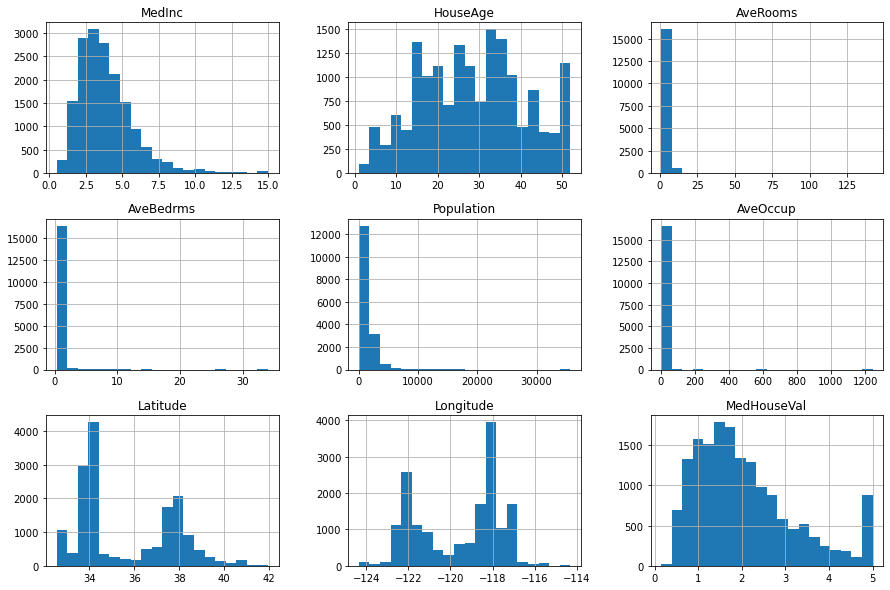

In [6]:
real_data.hist(bins=20, grid=True, figsize=(15, 10), layout=(3, 3))
plt.show()

In [7]:
synt_data_distilgpt2.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count   16640.000000  16640.000000  1.664000e+04  1.664000e+04  1.664000e+04   
mean       26.122903     32.189500  1.662227e+15  1.211539e+15  2.134011e+08   
std      1169.316491     96.833392  1.451900e+17  1.073029e+17  2.430964e+10   
min      -119.500000      2.000000  4.201443e-01 -1.230930e+02  1.000000e+00   
25%         2.514375     18.000000  4.278878e+00  9.944175e-01  8.950000e+02   
50%         3.522300     29.000000  5.241889e+00  1.038241e+00  1.274500e+03   
75%         5.037925     37.000000  6.335599e+00  1.089484e+00  1.853000e+03   
max    118959.000000   5047.000000  1.805621e+19  9.786769e+18  3.121105e+12   

           AveOccup      Latitude      Longitude   MedHouseVal  
count  1.664000e+04  16640.000000   16640.000000  16640.000000  
mean   2.271085e+15     46.227027    -128.954870      2.054896  
std    1.765792e+17    192.717884     955.204482      1.138888  
min    0.000000e+00   -122.290000 -122116.410000      0.149990  
25%    2.460733e+00     33.930000    -121.920000      1.186750  
50%    2.939540e+00     34.900000    -119.100000      1.804000  
75%    3.615591e+00     37.830000    -117.970000      2.640000  
max    2.122116e+19   5092.750000     122.350000      5.000010

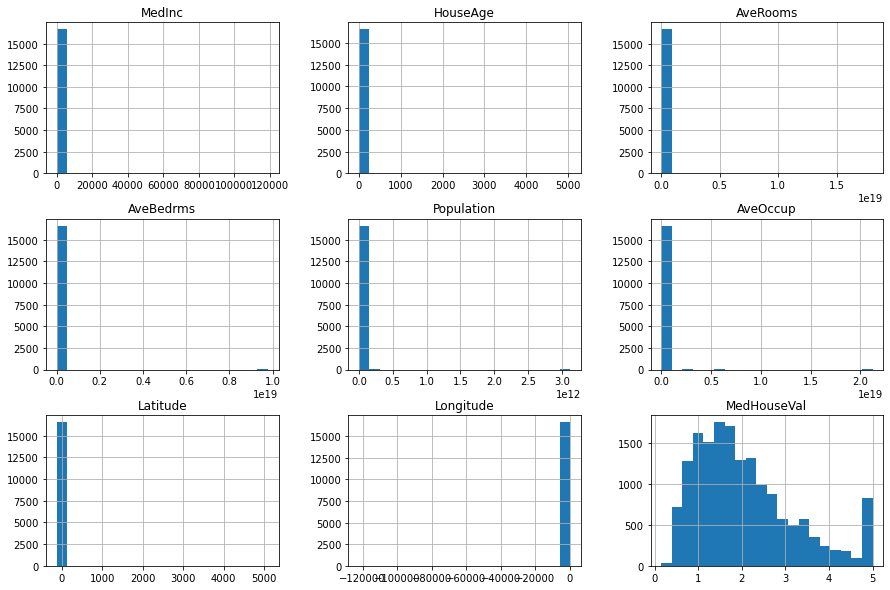

In [8]:
synt_data_distilgpt2.hist(bins=20, grid=True, figsize=(15, 10), layout=(3, 3))
plt.show()

In [9]:
synt_data_gpt2xl.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16640.000000  16640.000000  1.664000e+04  1.664000e+04  1.664000e+04   
mean       4.379028     27.288417  3.535191e+11  6.765045e+08  1.342344e+13   
std       30.993088     42.116233  3.955500e+13  8.726646e+10  1.727994e+15   
min        0.499900      1.000000  9.317685e-01 -1.189900e+02  6.000000e+00   
25%        2.608600     17.000000  4.477287e+00  9.962406e-01  8.880000e+02   
50%        3.635900     27.000000  5.276363e+00  1.040681e+00  1.250500e+03   
75%        5.013900     36.000000  6.229109e+00  1.090909e+00  1.815250e+03   
max     3828.000000   5215.000000  5.074163e+15  1.125704e+13  2.229042e+17   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  1.664000e+04  16640.000000  1.664000e+04  16640.000000  
mean   4.187257e+12     37.248768 -9.353617e+09      2.063421  
std    2.039584e+14     73.235261  9.400649e+11      1.144774  
min   -1.224200e+02   -122.370000 -1.194528e+14      0.149990  
25%    2.479035e+00     33.930000 -1.218400e+02      1.188000  
50%    2.886018e+00     34.420000 -1.186750e+02      1.804000  
75%    3.331280e+00     37.710000 -1.179700e+02      2.650250  
max    1.227957e+16   4094.750000  6.930000e+01      5.000010

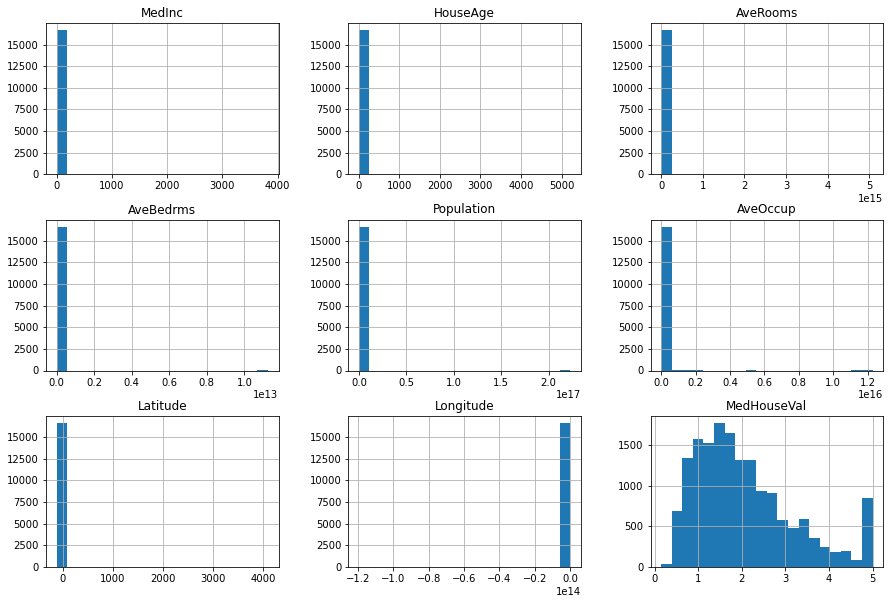

In [10]:
synt_data_gpt2xl.hist(bins=20, grid=True, figsize=(15, 10), layout=(3, 3))
plt.show()

In [11]:
synt_data_cerebras['AveBedrms'].min()

-10979228486164.0

In [12]:
synt_data_cerebras.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16640.000000  16640.000000  1.664000e+04  1.664000e+04  16640.000000   
mean       4.088578     27.332952  4.978833e+08 -5.935059e+08   1539.624590   
std       12.175642     12.663395  6.422502e+10  8.554202e+10   1457.311234   
min     -121.230000      0.949542 -1.220794e+02 -1.097923e+13      3.000000   
25%        2.556650     17.000000  4.444444e+00  9.979982e-01    899.000000   
50%        3.554050     27.000000  5.263816e+00  1.044474e+00   1252.000000   
75%        4.800375     36.000000  6.200600e+00  1.096223e+00   1808.000000   
max     1405.000100     52.000000  8.284779e+12  1.103290e+12  72787.000000   

           AveOccup      Latitude     Longitude  MedHouseVal  
count  1.664000e+04  16640.000000  1.664000e+04  16640.00000  
mean   1.691321e+65     36.214211 -7.339200e+06      2.06119  
std    2.181739e+67     39.650783  9.467116e+08      1.14510  
min    8.085687e-01   -121.820000 -1.221221e+11      0.14999  
25%    2.477839e+00     33.930000 -1.218300e+02      1.19400  
50%    2.885811e+00     34.440000 -1.190300e+02      1.79800  
75%    3.332250e+00     37.740000 -1.179775e+02      2.63200  
max    2.814358e+69   3629.000000  3.698000e+01      5.00001

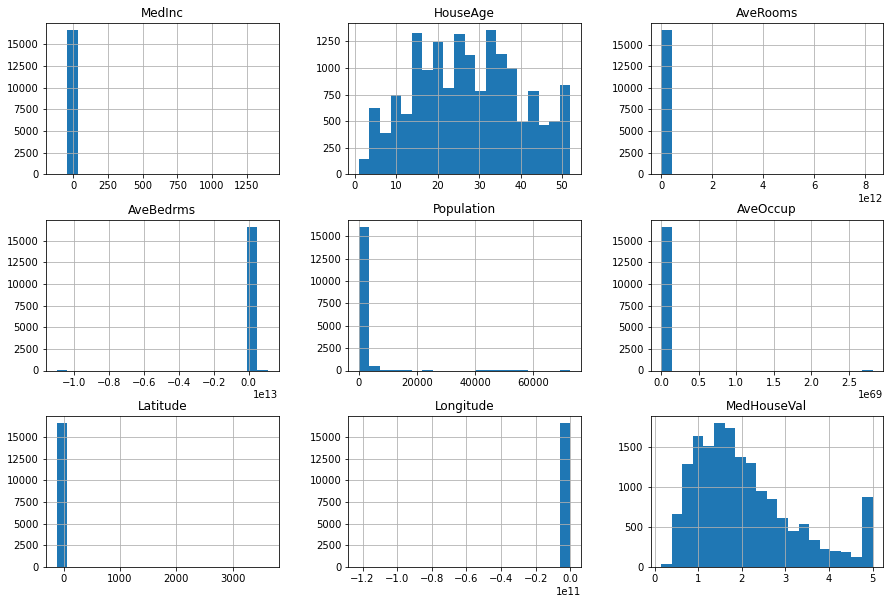

In [13]:
synt_data_cerebras.hist(bins=20, grid=True, figsize=(15, 10), layout=(3, 3))
plt.show()

In [14]:
synt_data_phi.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16640.000000  16640.000000  16640.000000  1.664000e+04  16640.000000   
mean       3.959780     27.534678      5.961208  5.933604e+09   1551.854085   
std        2.589791     32.219386     21.585335  7.654119e+11    992.005446   
min        0.486100      1.000000      0.802609  0.000000e+00      0.905000   
25%        2.536300     17.000000      4.353846  9.973498e-01    919.000000   
50%        3.519200     27.000000      5.169098  1.041791e+00   1278.000000   
75%        4.740400     36.000000      6.126762  1.090305e+00   1848.000000   
max      100.704200   2766.000000   2096.289858  9.873517e+13  15060.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  1.664000e+04  16640.000000  16640.000000  16640.000000  
mean   2.401224e+12     35.894659   -121.063035      2.063566  
std    2.482888e+14     26.037180    117.127057      1.142730  
min   -3.072513e+00   -122.010000 -11296.670000      0.149990  
25%    2.458824e+00     33.950000   -121.850000      1.193000  
50%    2.881433e+00     34.440000   -119.010000      1.805500  
75%    3.354839e+00     37.700000   -117.990000      2.647000  
max    3.160729e+16   3372.560000     -1.180000      5.000010

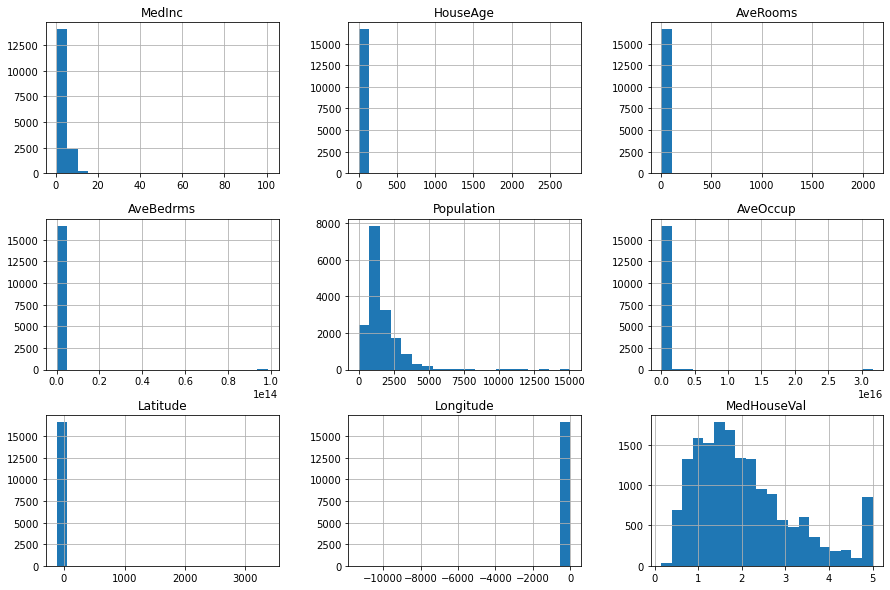

In [15]:
synt_data_phi.hist(bins=20, grid=True, figsize=(15, 10), layout=(3, 3))
plt.show()

In [16]:
synt_datasets = dict()
#synt_datasets['real'] = real_data
synt_datasets['distilgpt2'] = synt_data_distilgpt2
synt_datasets['gpt2xl'] = synt_data_gpt2xl
synt_datasets['cerebras'] = synt_data_cerebras
synt_datasets['phi'] = synt_data_phi

In [17]:
cols = real_data.columns

In [18]:
cols_compare = dict()
for col in cols:
    cols_compare[col] = {}
    cols_compare[col]['real'] = real_data[col].to_numpy()
    for synt in synt_datasets:
        cols_compare[col][synt] = synt_datasets[synt][col].to_numpy()


In [19]:
all_data = list()
for col in cols :
    all_data.append((col,[x for x in [(i,cols_compare[col][i]) for i in cols_compare[col]]]))


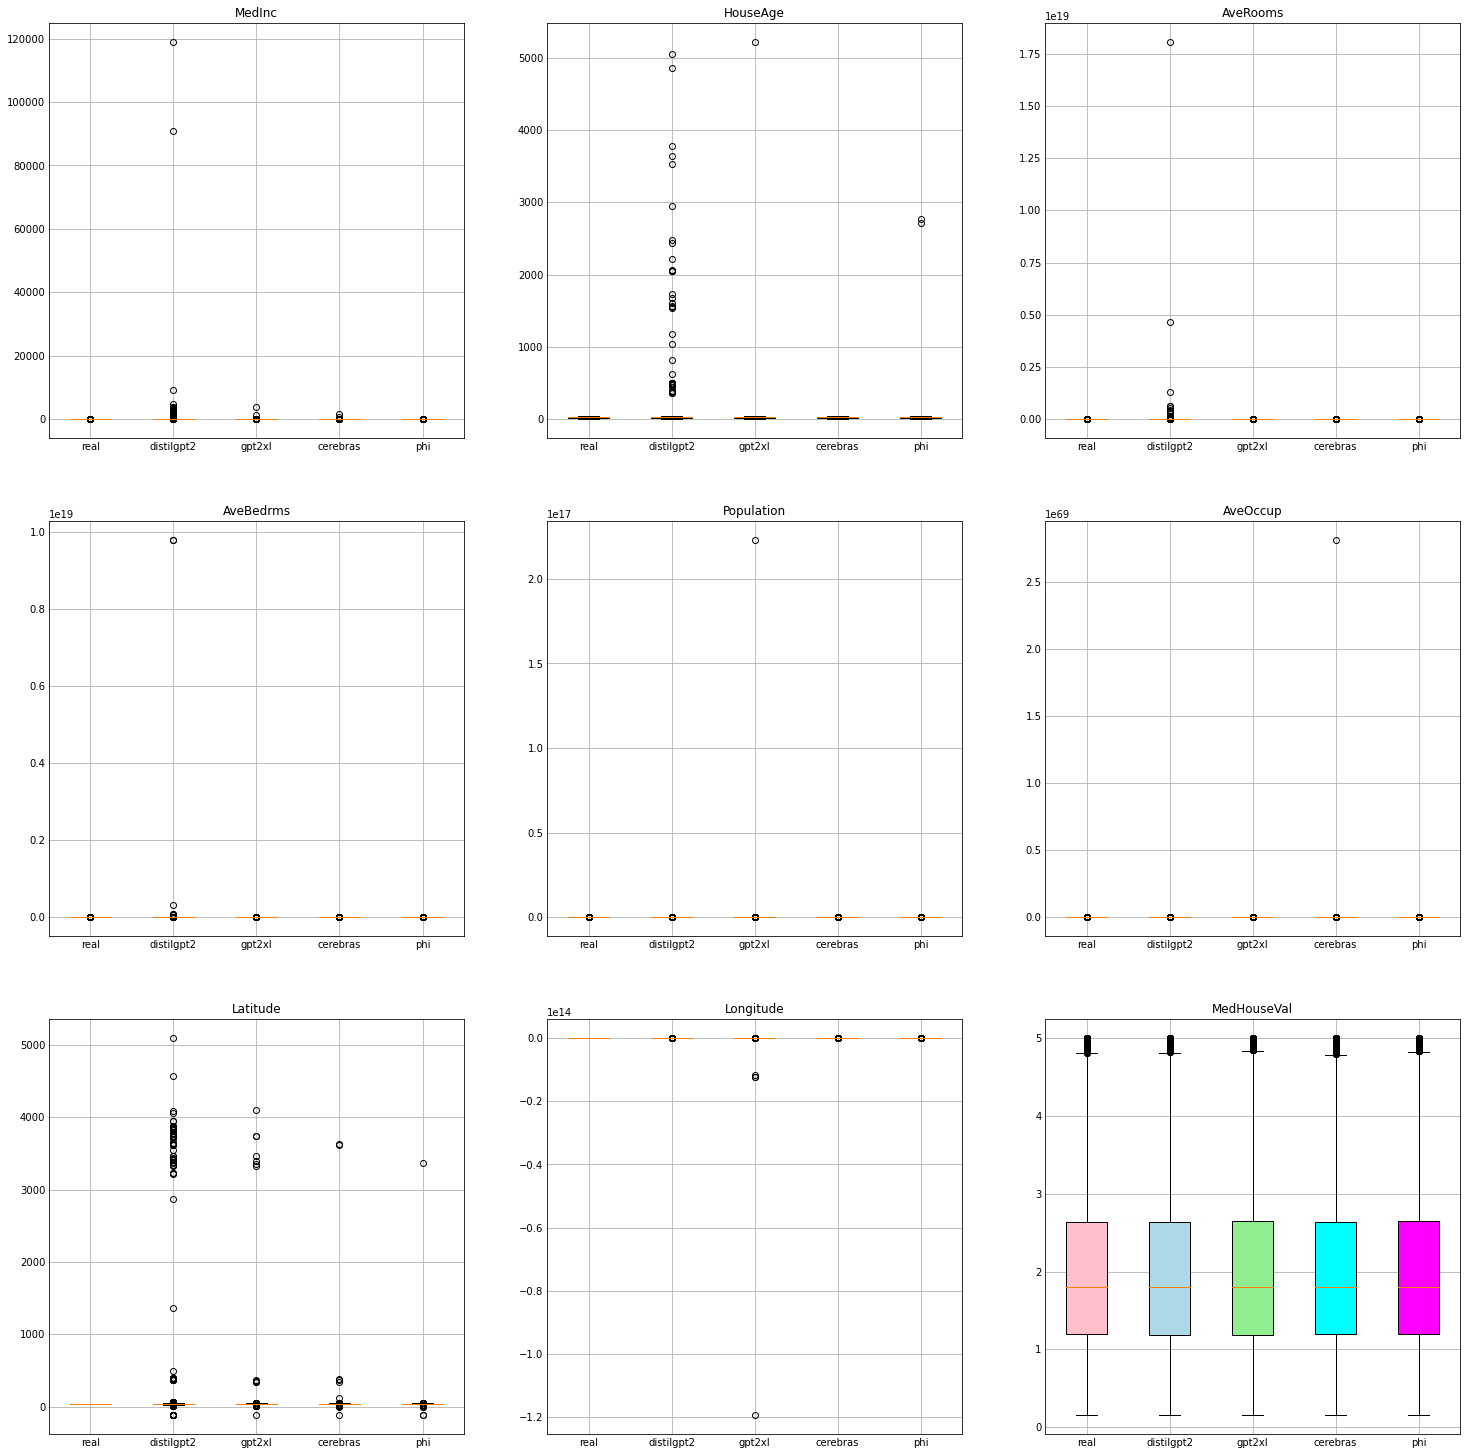

In [20]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data:
ncols=3
nrows=3

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
bplots = list()

for i, col in enumerate(all_data) :
    col_name = col[0]
    col_data = col[1]
    rw = i//ncols
    cl = i%ncols
    
    axs[rw,cl].set_title(col_name)
     
    bplots.append(axs[rw,cl].boxplot([x[1] for x in col_data],
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=[x[0] for x in col_data]))  # will be used to label x-ticks
           
#fill with colors
colors = ['pink', 'lightblue', 'lightgreen','cyan','magenta','yellow',]
for bplot in bplots:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.show()

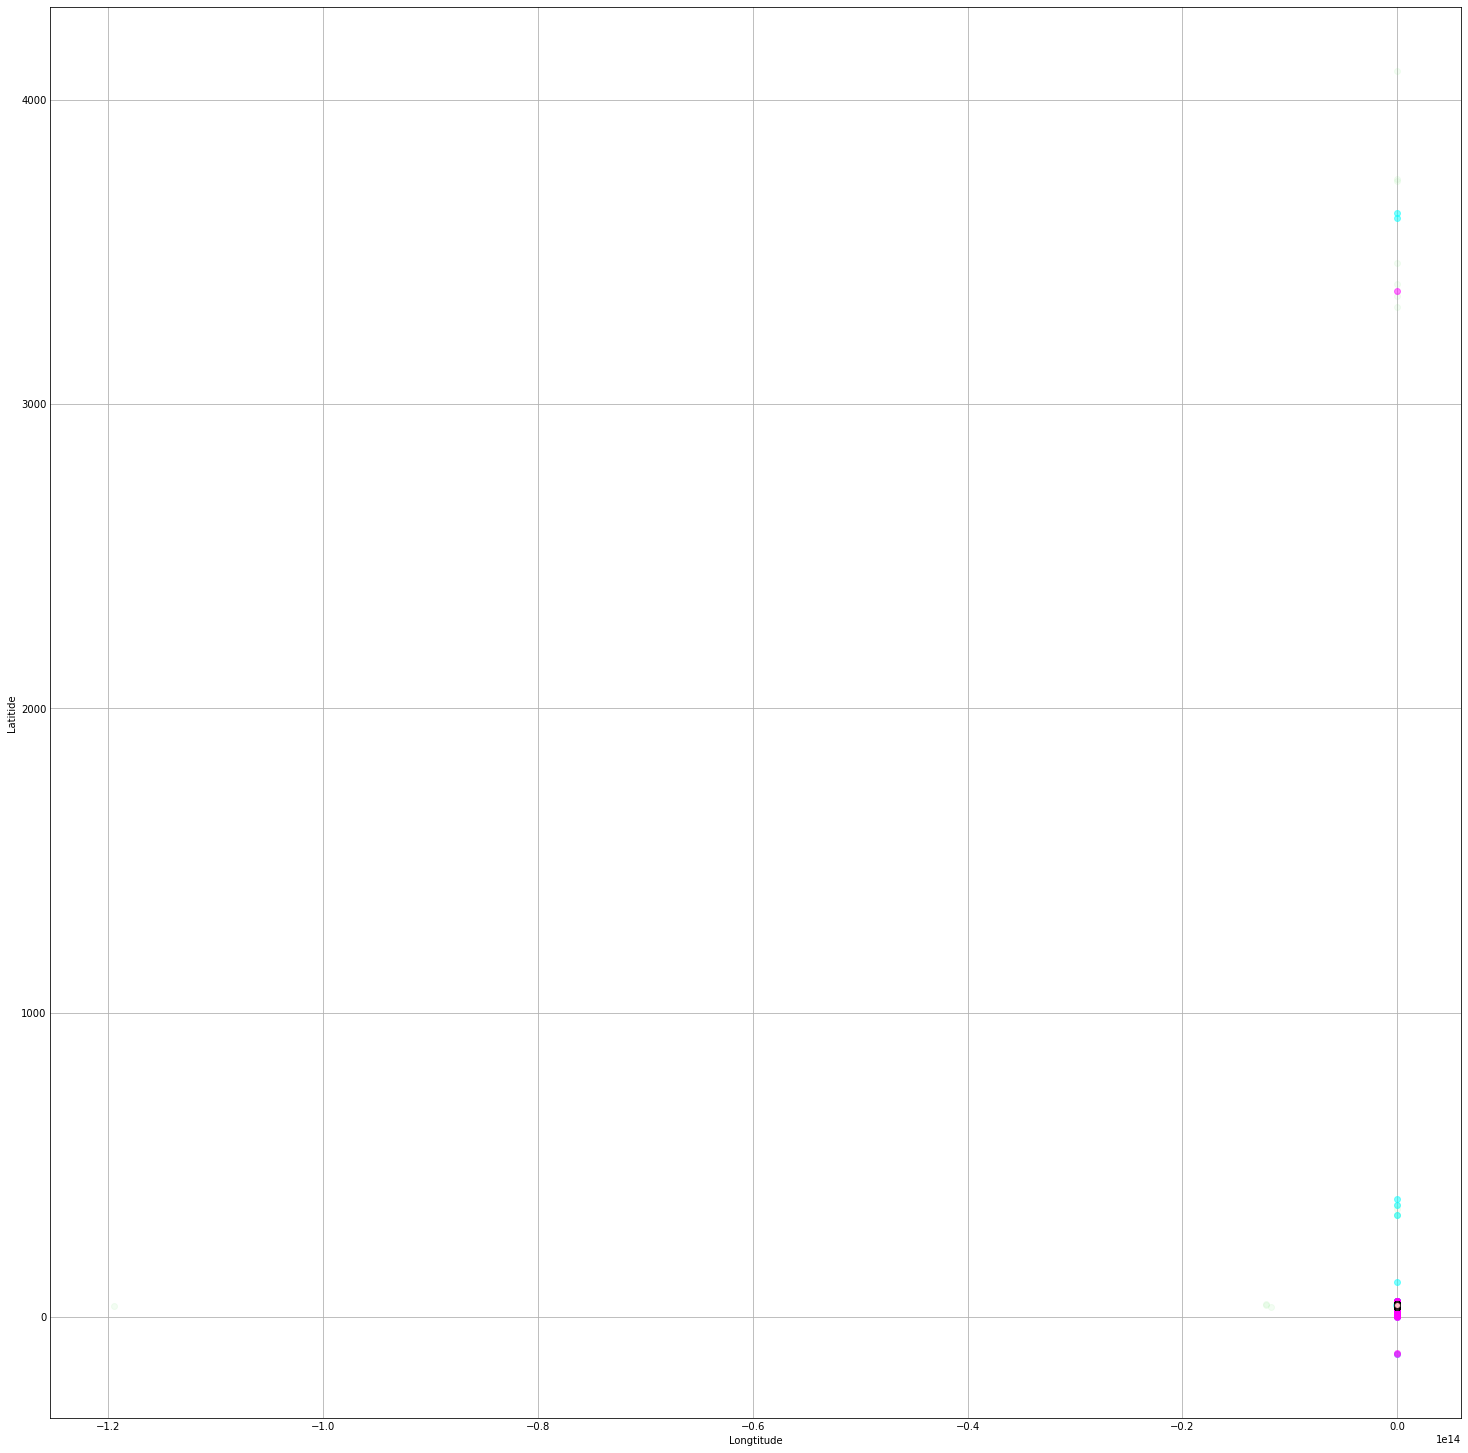

In [21]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("Longtitude")
plt.ylabel("Latitide")
#ax.scatter(cols_compare['Longitude']['distilgpt2'], cols_compare['Latitude']['distilgpt2'],c='lightblue', label='distilgpt2', alpha=0.5, edgecolors='lightblue')
ax.scatter(cols_compare['Longitude']['gpt2xl'], cols_compare['Latitude']['gpt2xl'],c='lightgreen', label='gpt2xl', alpha=0.1, edgecolors='lightgreen')
ax.scatter(cols_compare['Longitude']['cerebras'], cols_compare['Latitude']['cerebras'],c='cyan', label='cerebras', alpha=0.5, edgecolors='cyan')
ax.scatter(cols_compare['Longitude']['phi'], cols_compare['Latitude']['phi'],c='magenta', label='phi', alpha=0.5, edgecolors='magenta')

ax.scatter(cols_compare['Longitude']['real'], cols_compare['Latitude']['real'],c='pink', label='real', alpha=0.5, edgecolors='black')

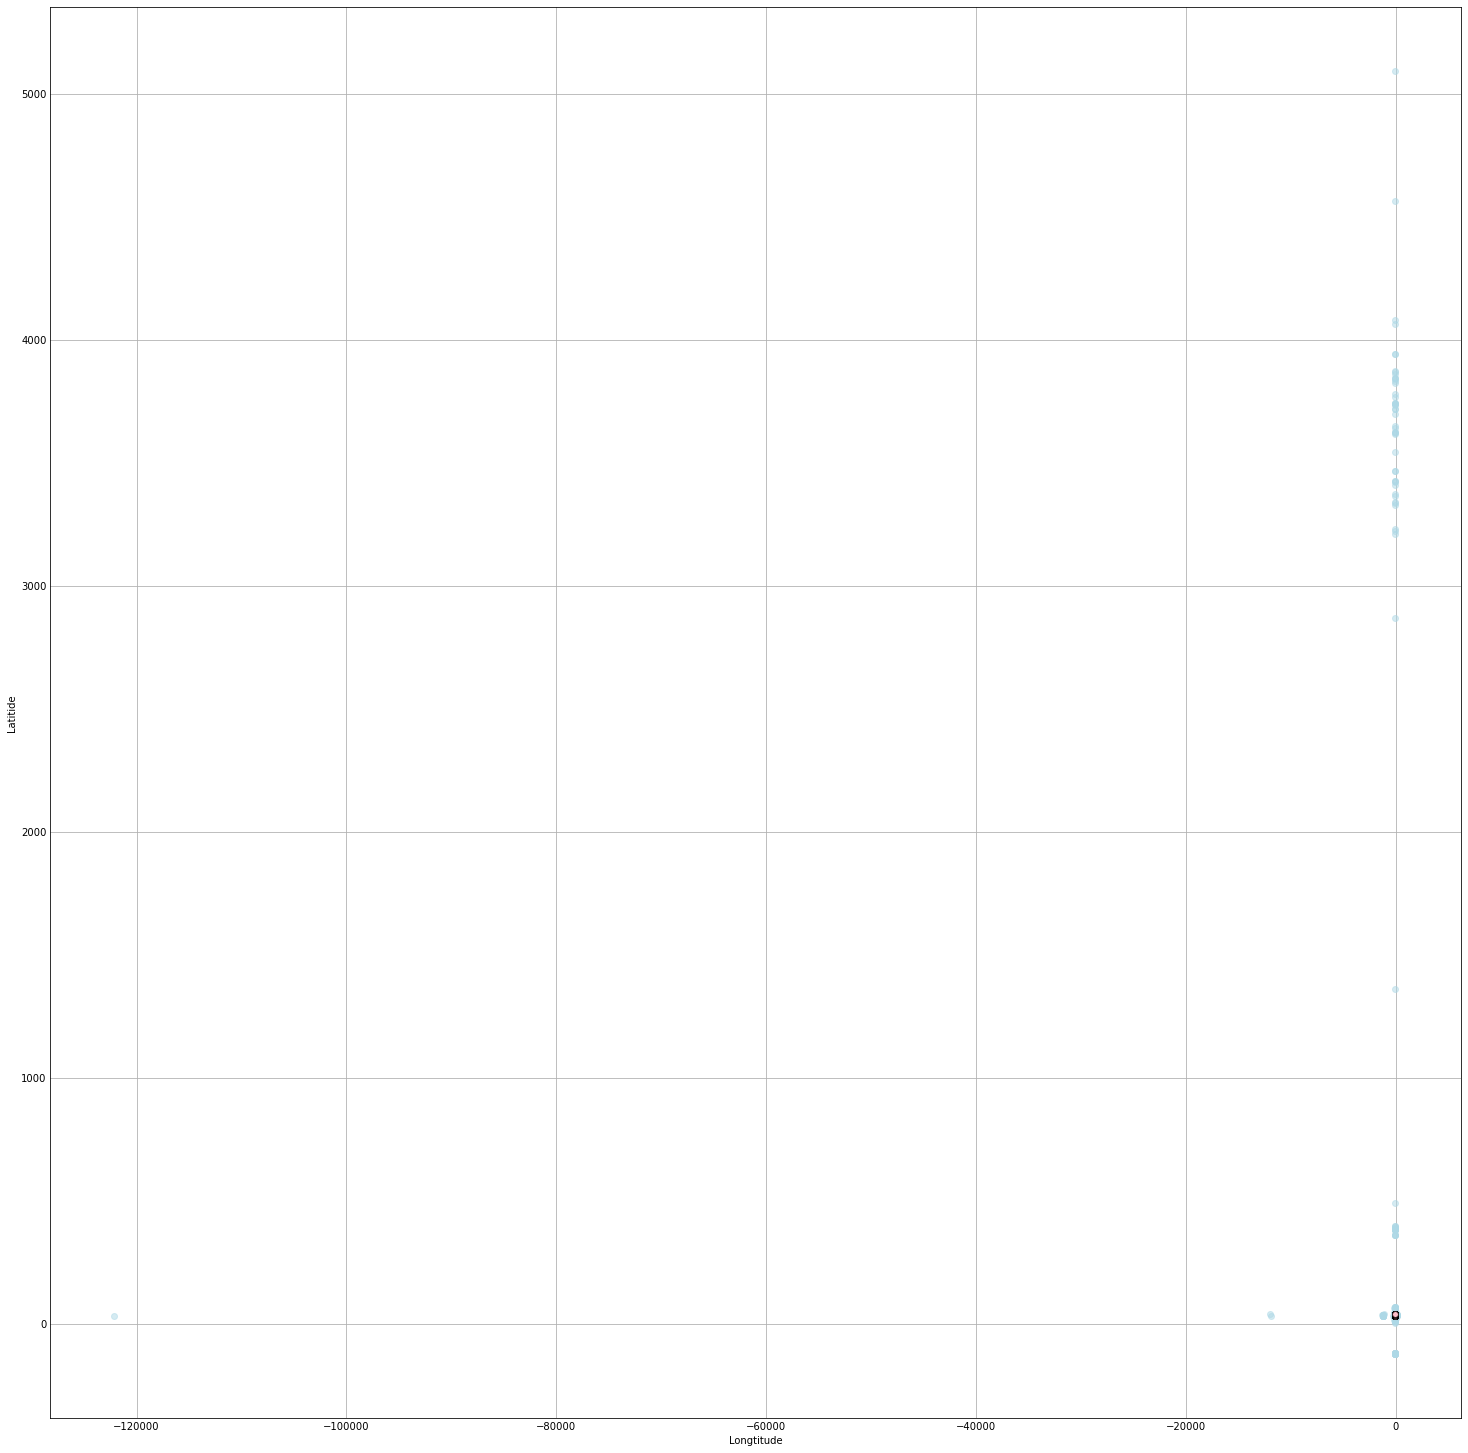

In [22]:
#outliers for distilgpt2 
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("Longtitude")
plt.ylabel("Latitide")
ax.scatter(cols_compare['Longitude']['distilgpt2'], cols_compare['Latitude']['distilgpt2'],c='lightblue', label='distilgpt2', alpha=0.5, edgecolors='lightblue')
ax.scatter(cols_compare['Longitude']['real'], cols_compare['Latitude']['real'],c='pink', label='real', alpha=0.5, edgecolors='black')

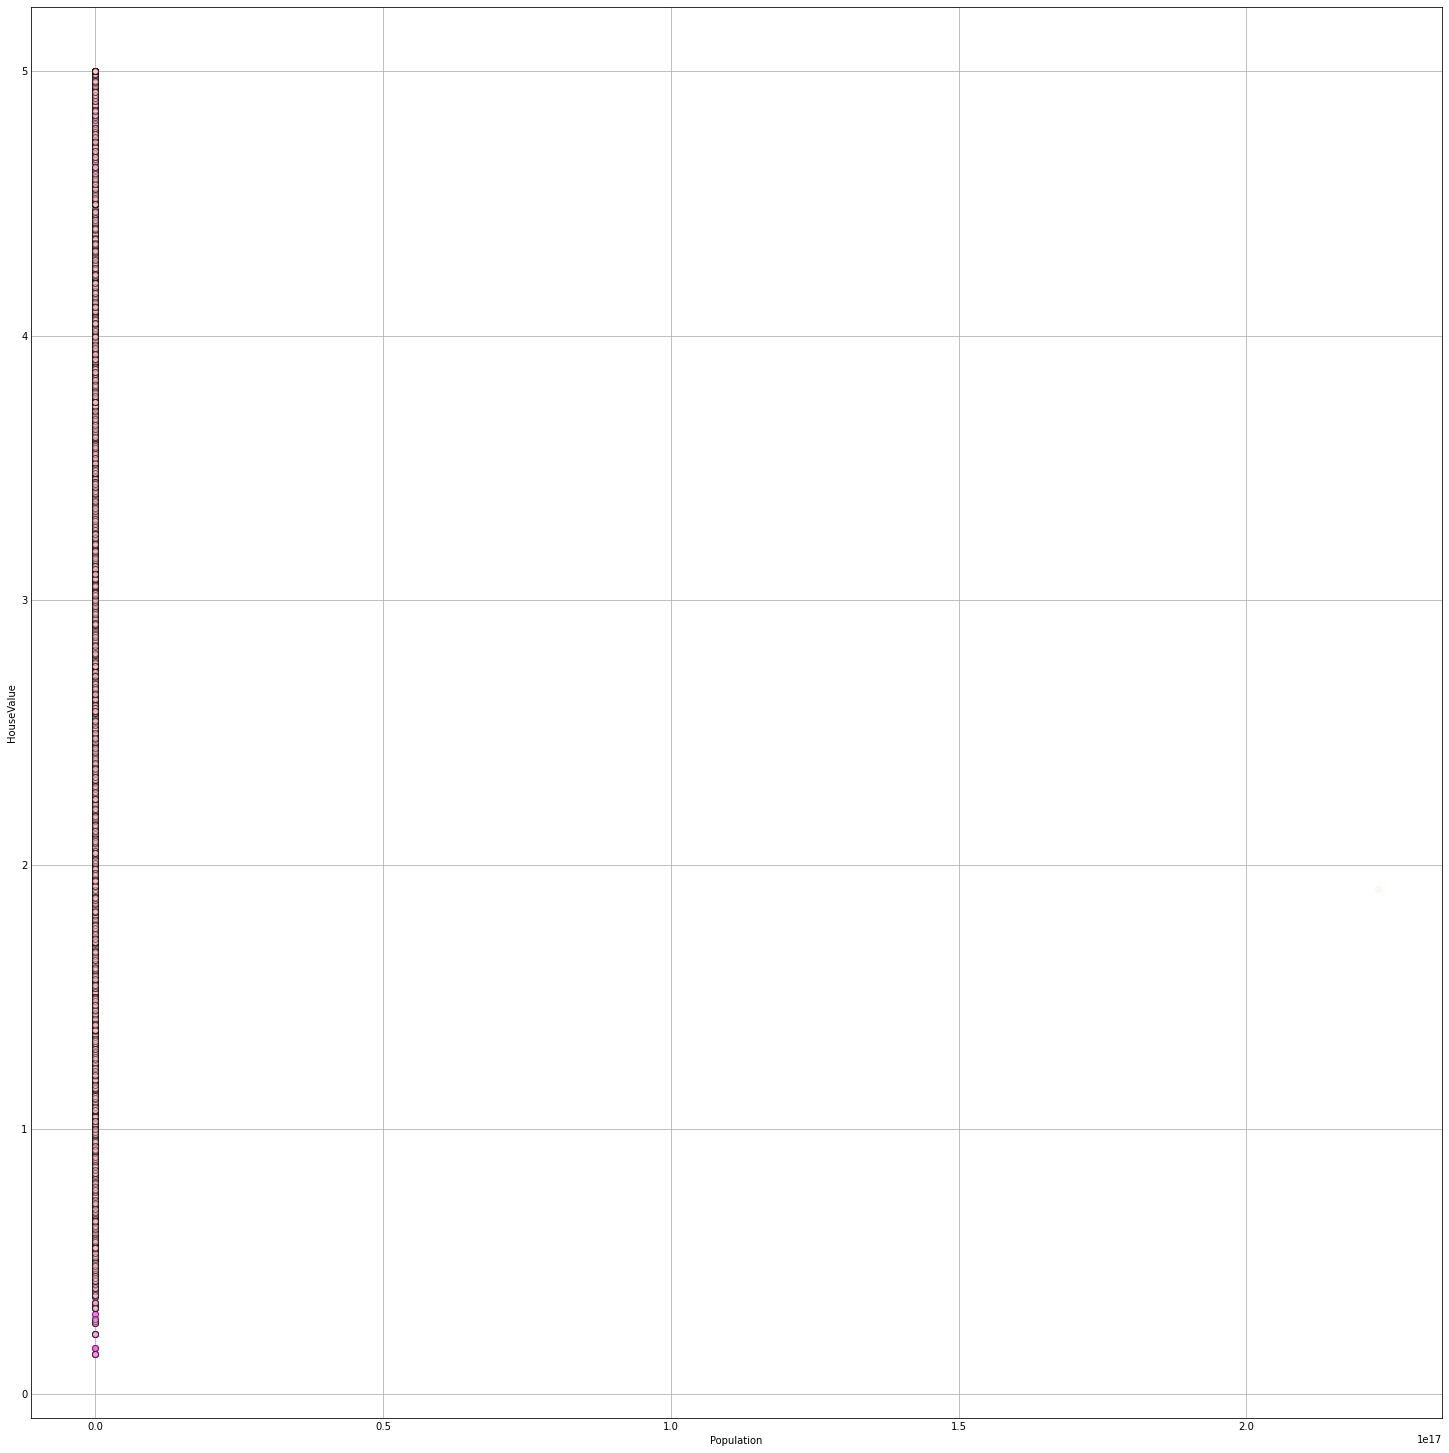

In [23]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("Population")
plt.ylabel("HouseValue")
#ax.scatter(cols_compare['Longitude']['real'], cols_compare['Latitude']['real'],c='pink', label='real', alpha=0.5, edgecolors='black')
#ax.scatter(cols_compare['Population']['distilgpt2'], cols_compare['MedHouseVal']['distilgpt2'],c='lightblue', label='distilgpt2', alpha=0.5, edgecolors='lightblue')
ax.scatter(cols_compare['Population']['gpt2xl'], cols_compare['MedHouseVal']['gpt2xl'],c='lightgreen', label='gpt2xl', alpha=0.1, edgecolors='lightgreen')
ax.scatter(cols_compare['Population']['cerebras'], cols_compare['MedHouseVal']['cerebras'],c='cyan', label='cerebras', alpha=0.5, edgecolors='cyan')
ax.scatter(cols_compare['Population']['phi'], cols_compare['MedHouseVal']['phi'],c='magenta', label='phi', alpha=0.5, edgecolors='magenta')
ax.scatter(cols_compare['Population']['real'], cols_compare['MedHouseVal']['real'],c='pink', label='real', alpha=0.5, edgecolors='black')

# Regression task on rough data

In [24]:
y1 = real_data['MedHouseVal']
X1 = real_data.drop("MedHouseVal", axis=1)
X_tr1, X_te1, y_tr1, y_te1 = train_test_split(X1, y1, test_size=0.2, random_state=random_state)

In [25]:
# define column transformer 
col_transformer = ColumnTransformer([
    ("num_col_transformer", StandardScaler(), ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']),
],remainder='passthrough')


# define a Pipeline with 2 steps: 1. transform columns; 2. Apply the model
model = Pipeline([
    ("col_transformer", col_transformer),
    ("estimator", LinearRegression())
]
)

In [26]:
regression_pipe = Pipeline([
    ('Scaler', StandardScaler()),
    ('LR', Ridge())
])

reg_parameters = {
    'LR__solver': ['saga', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'LR__alpha': [0.001, 0.01, 0.1, 1, 10],
}


## Real data regression

In [27]:
X_tr1, X_te1, y_tr1, y_te1 = train_test_split(X1, y1, test_size=0.2, random_state=random_state)

In [28]:
%%time
grid_pipe_log = GridSearchCV(regression_pipe, reg_parameters, cv=5, scoring='neg_root_mean_squared_error', verbose=3)
grid_pipe_log.fit(X_tr1, y_tr1)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.772 total time=   0.2s
[CV 2/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.712 total time=   0.2s
[CV 3/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.050 total time=   0.2s
[CV 4/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.709 total time=   0.2s
[CV 5/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.740 total time=   0.3s
[CV 1/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.772 total time=   0.0s
[CV 2/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.712 total time=   0.0s
[CV 3/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.050 total time=   0.0s
[CV 4/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.709 total time=   0.0s
[CV 5/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.740 total time=   0.0s
[CV 1/5] END LR__alpha=0.001, LR__solver=cholesky;, score=-0.772 total time=   0.0s
[CV 2/5] END LR__alpha=0.001, LR__solver=cho

[CV 1/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.772 total time=   0.1s
[CV 2/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.712 total time=   0.1s
[CV 3/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.049 total time=   0.2s
[CV 4/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.709 total time=   0.2s
[CV 5/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.740 total time=   0.2s
[CV 1/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.772 total time=   0.4s
[CV 2/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.712 total time=   0.4s
[CV 3/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.050 total time=   0.3s
[CV 4/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.709 total time=   0.3s
[CV 5/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.740 total time=   0.4s
[CV 1/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....LR__alpha=

C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Conda\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    re

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('LR', Ridge())]),
             param_grid={'LR__alpha': [0.001, 0.01, 0.1, 1, 10],
                         'LR__solver': ['saga', 'svd', 'cholesky', 'lsqr',
                                        'sparse_cg', 'sag', 'saga', 'lbfgs']},
             scoring='neg_root_mean_squared_error', verbose=3)

In [29]:
print(grid_pipe_log.best_score_)
print(grid_pipe_log.best_estimator_.steps[1][1])

-0.7963941997179204
Ridge(alpha=1, solver='svd')


In [30]:
y_tr_pr1 = grid_pipe_log.best_estimator_.predict(X_tr1)
mse_tr1 = mean_squared_error(y_tr1,y_tr_pr1, squared=True)
y_te_pr1 = grid_pipe_log.best_estimator_.predict(X_te1)
mse_te1 = mean_squared_error(y_te1,y_te_pr1, squared=True)

In [31]:
print('LR model real data: RMSE train =',mse_tr1,', RMSE test',mse_te1)

LR model real data: RMSE train = 0.520362665148444 , RMSE test 0.5274764719545153


In [32]:
model_results = pd.DataFrame(columns=['Model','Dataset','RMSE'])
res_test = pd.DataFrame([['Real data','Real test',
                        mse_te1]],
                        columns=['Model','Dataset','RMSE'])

model_results = pd.concat([model_results, res_test],axis=0)

C:\Users\AlexeyNeyman\AppData\Local\Temp\ipykernel_17368\3798510043.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_results = pd.concat([model_results, res_test],axis=0)


## DistillGPT2 regression

In [33]:
y2 = synt_data_distilgpt2['MedHouseVal']
X2 = synt_data_distilgpt2.drop("MedHouseVal", axis=1)
X_tr2, X_te2, y_tr2, y_te2 = train_test_split(X2, y2, test_size=0.2, random_state=random_state)

In [34]:
%%time
grid_pipe_log = GridSearchCV(regression_pipe, reg_parameters, cv=5, scoring='neg_root_mean_squared_error', verbose=3)
grid_pipe_log.fit(X_tr2, y_tr2)

print(grid_pipe_log.best_score_)
print(grid_pipe_log.best_estimator_.steps[1][1])

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.163 total time=   0.0s
[CV 2/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.148 total time=   0.0s
[CV 3/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.133 total time=   0.0s
[CV 4/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.623 total time=   0.0s
[CV 5/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.143 total time=   0.0s
[CV 1/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.163 total time=   0.0s
[CV 2/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.148 total time=   0.0s
[CV 3/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.133 total time=   0.0s
[CV 4/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.623 total time=   0.0s
[CV 5/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.143 total time=   0.0s
[CV 1/5] END LR__alpha=0.001, LR__solver=cholesky;, score=-1.163 total time=   0.0s
[CV 2/5] END LR__alpha=0.001, LR__solver=cho

[CV 3/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.133 total time=   0.0s
[CV 4/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.623 total time=   0.0s
[CV 5/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.143 total time=   0.0s
[CV 1/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.163 total time=   0.0s
[CV 2/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.148 total time=   0.0s
[CV 3/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.133 total time=   0.0s
[CV 4/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.623 total time=   0.0s
[CV 5/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.143 total time=   0.0s
[CV 1/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....LR__alpha=

C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Conda\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    re

In [35]:
y_tr_pr2 = grid_pipe_log.best_estimator_.predict(X_tr2)
mse_tr2 = mean_squared_error(y_tr2,y_tr_pr2, squared=True)
y_te_pr2 = grid_pipe_log.best_estimator_.predict(X_te2)
mse_te2 = mean_squared_error(y_te2,y_te_pr2, squared=True)
y_tr_pr12 = grid_pipe_log.best_estimator_.predict(X_tr1)
mse_tr12 = mean_squared_error(y_tr1,y_tr_pr12,squared=False)
y_te_pr12 = grid_pipe_log.best_estimator_.predict(X_te1)
mse_te12 = mean_squared_error(y_te1,y_te_pr12,squared=False)

In [36]:
print('LR model Distilled GPT syntetic data: MSE train =',mse_tr2,', MSE test',mse_te2)
print('LR model Distilled GPT syntetic data: MSE from real train data =',mse_tr12,', MSE from real test data',mse_te12)

LR model Distilled GPT syntetic data: MSE train = 1.2919806507826452 , MSE test 1.3097677921259747
LR model Distilled GPT syntetic data: MSE from real train data = 1.151969576910564 , MSE from real test data 1.1371747523756


In [37]:
res_test = pd.DataFrame([['Distilled GPT','Synth test',
                        mse_te2],['Distilled GPT','Real test',
                        mse_te12]],
                        columns=['Model','Dataset','RMSE'])

model_results = pd.concat([model_results, res_test],axis=0)

## GPT2XL regression

In [38]:
y3 = synt_data_gpt2xl['MedHouseVal']
X3 = synt_data_gpt2xl.drop("MedHouseVal", axis=1)
X_tr3, X_te3, y_tr3, y_te3 = train_test_split(X3, y3, test_size=0.2, random_state=random_state)

In [39]:
%%time
grid_pipe_log = GridSearchCV(regression_pipe, reg_parameters, cv=5, scoring='neg_root_mean_squared_error', verbose=3)
grid_pipe_log.fit(X_tr3, y_tr3)

print(grid_pipe_log.best_score_)
print(grid_pipe_log.best_estimator_.steps[1][1])

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END LR__alpha=0.001, LR__solver=saga;, score=-255010876.911 total time=   0.0s
[CV 2/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.142 total time=   0.0s
[CV 3/5] END LR__alpha=0.001, LR__solver=saga;, score=-19.373 total time=   0.0s
[CV 4/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.138 total time=   0.0s
[CV 5/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.140 total time=   0.0s
[CV 1/5] END LR__alpha=0.001, LR__solver=svd;, score=-255011847.583 total time=   0.0s
[CV 2/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.142 total time=   0.0s
[CV 3/5] END .LR__alpha=0.001, LR__solver=svd;, score=-19.374 total time=   0.0s
[CV 4/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.138 total time=   0.0s
[CV 5/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.140 total time=   0.0s
[CV 1/5] END LR__alpha=0.001, LR__solver=cholesky;, score=-255011847.583 total time=   0.0s
[CV 2/5] END LR__alpha=

[CV 5/5] END ...LR__alpha=0.1, LR__solver=lsqr;, score=-1.140 total time=   0.0s
[CV 1/5] END LR__alpha=0.1, LR__solver=sparse_cg;, score=-255008838.439 total time=   0.0s
[CV 2/5] END LR__alpha=0.1, LR__solver=sparse_cg;, score=-1.142 total time=   0.0s
[CV 3/5] END LR__alpha=0.1, LR__solver=sparse_cg;, score=-19.373 total time=   0.0s
[CV 4/5] END LR__alpha=0.1, LR__solver=sparse_cg;, score=-1.138 total time=   0.0s
[CV 5/5] END LR__alpha=0.1, LR__solver=sparse_cg;, score=-1.140 total time=   0.0s
[CV 1/5] END LR__alpha=0.1, LR__solver=sag;, score=-255023357.410 total time=   0.0s
[CV 2/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.142 total time=   0.0s
[CV 3/5] END ...LR__alpha=0.1, LR__solver=sag;, score=-19.373 total time=   0.0s
[CV 4/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.138 total time=   0.1s
[CV 5/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.140 total time=   0.0s
[CV 1/5] END LR__alpha=0.1, LR__solver=saga;, score=-255009542.782 total time=   0.0s


-50952880.926217645
Ridge(alpha=10, solver='sparse_cg')
CPU times: total: 7.84 s
Wall time: 8.44 s


C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Conda\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    re

In [40]:
y_tr_pr3 = grid_pipe_log.best_estimator_.predict(X_tr3)
mse_tr3 = mean_squared_error(y_tr3,y_tr_pr3, squared=True)
y_te_pr3 = grid_pipe_log.best_estimator_.predict(X_te3)
mse_te3 = mean_squared_error(y_te3,y_te_pr3, squared=True)
y_tr_pr13 = grid_pipe_log.best_estimator_.predict(X_tr1)
mse_tr13 = mean_squared_error(y_tr1,y_tr_pr13,squared=False)
y_te_pr13 = grid_pipe_log.best_estimator_.predict(X_te1)
mse_te13 = mean_squared_error(y_te1,y_te_pr13,squared=False)

In [41]:
print('LR model GPT2XL syntetic data: MSE train =',mse_tr3,', MSE test',mse_te3)
print('LR model GPT2XL syntetic data: MSE from real train data =',mse_tr13,', MSE from real test data',mse_te13)

LR model GPT2XL syntetic data: MSE train = 1.2970990854050393 , MSE test 1.5771141545674823
LR model GPT2XL syntetic data: MSE from real train data = 1.1458949736399644 , MSE from real test data 1.129454344582687


In [42]:
res_test = pd.DataFrame([['GPT2XL','Synth test',
                        mse_te3],['GPT2XL','Real test',
                        mse_te13]],
                        columns=['Model','Dataset','RMSE'])

model_results = pd.concat([model_results, res_test],axis=0)

## Cerebras regression

In [43]:
y4 = synt_data_cerebras['MedHouseVal']
X4 = synt_data_cerebras.drop("MedHouseVal", axis=1)
X_tr4, X_te4, y_tr4, y_te4 = train_test_split(X4, y4, test_size=0.2, random_state=random_state)

In [44]:
%%time
grid_pipe_log = GridSearchCV(regression_pipe, reg_parameters, cv=5, scoring='neg_root_mean_squared_error', verbose=3)
grid_pipe_log.fit(X_tr4, y_tr4)

print(grid_pipe_log.best_score_)
print(grid_pipe_log.best_estimator_.steps[1][1])

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.446 total time=   0.0s
[CV 2/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.120 total time=   0.0s
[CV 3/5] END LR__alpha=0.001, LR__solver=saga;, score=-60701.878 total time=   0.0s
[CV 4/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.134 total time=   0.0s
[CV 5/5] END LR__alpha=0.001, LR__solver=saga;, score=-198754050534786557746583838518224848118132782391099392.000 total time=   0.0s
[CV 1/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.446 total time=   0.0s
[CV 2/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.120 total time=   0.0s
[CV 3/5] END LR__alpha=0.001, LR__solver=svd;, score=-60758.980 total time=   0.0s
[CV 4/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.134 total time=   0.0s
[CV 5/5] END LR__alpha=0.001, LR__solver=svd;, score=-198771861181338414442306418373573950614105396042792960.000 total time=   0.0s
[CV 1/5] END LR__alp

[CV 1/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.446 total time=   0.0s
[CV 2/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.120 total time=   0.0s
[CV 3/5] END LR__alpha=0.1, LR__solver=sag;, score=-60758.353 total time=   0.0s
[CV 4/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.134 total time=   0.0s
[CV 5/5] END LR__alpha=0.1, LR__solver=sag;, score=-198785538049642335836778073533954052480133112012996608.000 total time=   0.0s
[CV 1/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.446 total time=   0.0s
[CV 2/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.120 total time=   0.0s
[CV 3/5] END LR__alpha=0.1, LR__solver=saga;, score=-60707.536 total time=   0.0s
[CV 4/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.134 total time=   0.0s
[CV 5/5] END LR__alpha=0.1, LR__solver=saga;, score=-198710652805048159098421972451407320803568139162877952.000 total time=   0.0s
[CV 1/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] 

C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Conda\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    re

In [45]:
y_tr_pr4 = grid_pipe_log.best_estimator_.predict(X_tr4)
mse_tr4 = mean_squared_error(y_tr4,y_tr_pr4, squared=True)
y_te_pr4 = grid_pipe_log.best_estimator_.predict(X_te4)
mse_te4 = mean_squared_error(y_te4,y_te_pr4, squared=True)
y_tr_pr14 = grid_pipe_log.best_estimator_.predict(X_tr1)
mse_tr14 = mean_squared_error(y_tr1,y_tr_pr14,squared=False)
y_te_pr14 = grid_pipe_log.best_estimator_.predict(X_te1)
mse_te14 = mean_squared_error(y_te1,y_te_pr14,squared=False)

In [46]:
print('LR model Cerebras syntetic data: MSE train =',mse_tr4,', MSE test',mse_te4)
print('LR model Cerebras syntetic data: MSE from real train data =',mse_tr14,', MSE from real test data',mse_te14)

LR model Cerebras syntetic data: MSE train = 1.2895923523362012 , MSE test 1.6695373125981528e+16
LR model Cerebras syntetic data: MSE from real train data = 1.1348935947032532 , MSE from real test data 1.118950330951187


In [47]:
res_test = pd.DataFrame([['Cerebras','Synth test',
                        mse_te4],['Cerebras','Real test',
                        mse_te14]],
                        columns=['Model','Dataset','RMSE'])

model_results = pd.concat([model_results, res_test],axis=0)

## Phi1.5 regression

In [48]:
y5 = synt_data_phi['MedHouseVal']
X5 = synt_data_phi.drop("MedHouseVal", axis=1)
X_tr5, X_te5, y_tr5, y_te5 = train_test_split(X5, y5, test_size=0.2, random_state=random_state)

In [49]:
%%time
grid_pipe_log = GridSearchCV(regression_pipe, reg_parameters, cv=5, scoring='neg_root_mean_squared_error', verbose=3)
grid_pipe_log.fit(X_tr5, y_tr5)

print(grid_pipe_log.best_score_)
print(grid_pipe_log.best_estimator_.steps[1][1])

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.042 total time=   0.0s
[CV 2/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.029 total time=   0.0s
[CV 3/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.963 total time=   0.0s
[CV 4/5] END .LR__alpha=0.001, LR__solver=saga;, score=-2.993 total time=   0.0s
[CV 5/5] END LR__alpha=0.001, LR__solver=saga;, score=-13188099093.788 total time=   0.0s
[CV 1/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.042 total time=   0.0s
[CV 2/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.029 total time=   0.0s
[CV 3/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.963 total time=   0.0s
[CV 4/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-2.986 total time=   0.0s
[CV 5/5] END LR__alpha=0.001, LR__solver=svd;, score=-13191097486.195 total time=   0.0s
[CV 1/5] END LR__alpha=0.001, LR__solver=cholesky;, score=-1.042 total time=   0.0s
[CV 2/5] END LR__alpha=0.00

[CV 1/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.042 total time=   0.0s
[CV 2/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.029 total time=   0.0s
[CV 3/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.963 total time=   0.0s
[CV 4/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-2.986 total time=   0.0s
[CV 5/5] END LR__alpha=0.1, LR__solver=sag;, score=-13189987692.955 total time=   0.0s
[CV 1/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.042 total time=   0.0s
[CV 2/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.029 total time=   0.0s
[CV 3/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.963 total time=   0.0s
[CV 4/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-2.987 total time=   0.0s
[CV 5/5] END LR__alpha=0.1, LR__solver=saga;, score=-13188823990.243 total time=   0.0s
[CV 1/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ..

C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Conda\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    re

In [50]:
y_tr_pr5 = grid_pipe_log.best_estimator_.predict(X_tr5)
mse_tr5 = mean_squared_error(y_tr5,y_tr_pr5, squared=True)
y_te_pr5 = grid_pipe_log.best_estimator_.predict(X_te5)
mse_te5 = mean_squared_error(y_te5,y_te_pr5, squared=True)
y_tr_pr15 = grid_pipe_log.best_estimator_.predict(X_tr1)
mse_tr15 = mean_squared_error(y_tr1,y_tr_pr15,squared=False)
y_te_pr15 = grid_pipe_log.best_estimator_.predict(X_te1)
mse_te15 = mean_squared_error(y_te1,y_te_pr15,squared=False)

In [51]:
print('LR model Phi15 syntetic data: MSE train =',mse_tr5,', MSE test',mse_te5)
print('LR model Phi15 syntetic data: MSE from real train data =',mse_tr15,', MSE from real test data',mse_te15)

LR model Phi15 syntetic data: MSE train = 0.9912151424087111 , MSE test 5.162163539295071
LR model Phi15 syntetic data: MSE from real train data = 0.9196189789140684 , MSE from real test data 0.9128535295305318


In [52]:
res_test = pd.DataFrame([['Phi15','Synth test',
                        mse_te5],['Phi15','Real test',
                        mse_te15]],
                        columns=['Model','Dataset','RMSE'])

model_results = pd.concat([model_results, res_test],axis=0)

## Modelling results 

In [53]:
model_results

Model     Dataset          RMSE
0      Real data   Real test  5.274765e-01
0  Distilled GPT  Synth test  1.309768e+00
1  Distilled GPT   Real test  1.137175e+00
0         GPT2XL  Synth test  1.577114e+00
1         GPT2XL   Real test  1.129454e+00
0       Cerebras  Synth test  1.669537e+16
1       Cerebras   Real test  1.118950e+00
0          Phi15  Synth test  5.162164e+00
1          Phi15   Real test  9.128535e-01

In [54]:
model_results.to_csv('model_results_shorthouses_temp1.4.csv')

# Privacy metrics

In [55]:
from pandas import DataFrame, Series
from typing import List, Tuple, Dict, Callable
import scipy.stats as ss
from sklearn.neighbors import NearestNeighbors
from scipy.stats import mannwhitneyu, chisquare, ks_2samp



In [56]:
# bound value to determine quantiles
dcr_quantile = 0.95
# how many bins should be created for privacy histograms
privacy_number_of_bins = 30
#to avoid devision by zero
smoothing_factor = 1e-8
#test sample ratio
ratio = 0.5

random_state = 12*13*99*17-1

In [57]:
tgt_train = real_data
tgt_test = control_dataset

In [58]:
nn_model = NearestNeighbors(metric='minkowski', algorithm="ball_tree",n_jobs=None)
nn_model.fit(tgt_train)

NearestNeighbors(algorithm='ball_tree')

## Real data privacy

In [59]:
tgt_test_neighbors = nn_model.kneighbors(tgt_test, n_neighbors=2)

In [60]:
print('Stats : mean, std, max, min, amount')
dcr_real = tgt_test_neighbors[0][:, 0]
#print('DCR  stats', dcr_real.mean(), dcr_real.std(), dcr_real.max(), dcr_real.min(), len(dcr_real))
dcr2_real = tgt_test_neighbors[0][:, 1]
#print('DCR2 stats', dcr2_real.mean(), dcr2_real.std(), dcr2_real.max(), dcr2_real.min(), len (dcr2_real))
nndr_real = dcr_real / np.maximum(dcr2_real, smoothing_factor)    
print('NNDR stats', nndr_real.mean(), nndr_real.std(), nndr_real.max(), nndr_real.min(), len (nndr_real))
baseline_dcr = dcr_real
bound = np.quantile(baseline_dcr[~np.isnan(baseline_dcr)], dcr_quantile)
dcr_real_norm = np.where(dcr_real <= bound, dcr_real / bound, 1)
print('nDCR stats', dcr_real_norm.mean(), dcr_real_norm.std(), dcr_real_norm.max(), dcr_real_norm.min(), len(dcr_real_norm))
print('Bound',bound)

Stats : mean, std, max, min, amount
NNDR stats 0.8049014780886282 0.15945074183200192 0.9999979823195819 0.07821550603275805 4000
nDCR stats 0.49974653137970304 0.20714787051051878 1.0 0.030742811948517867 4000
Bound 7.432462929776719


array([[<AxesSubplot:title={'center':'Distance to Closest Record (DCR) for RealData'}>,
        <AxesSubplot:title={'center':'Normal Distance to Closest Record (nDCR) for RealData'}>,
        <AxesSubplot:title={'center':'Nearest Neighbor Distance Ratio (NNDR) for RealData'}>]],
      dtype=object)

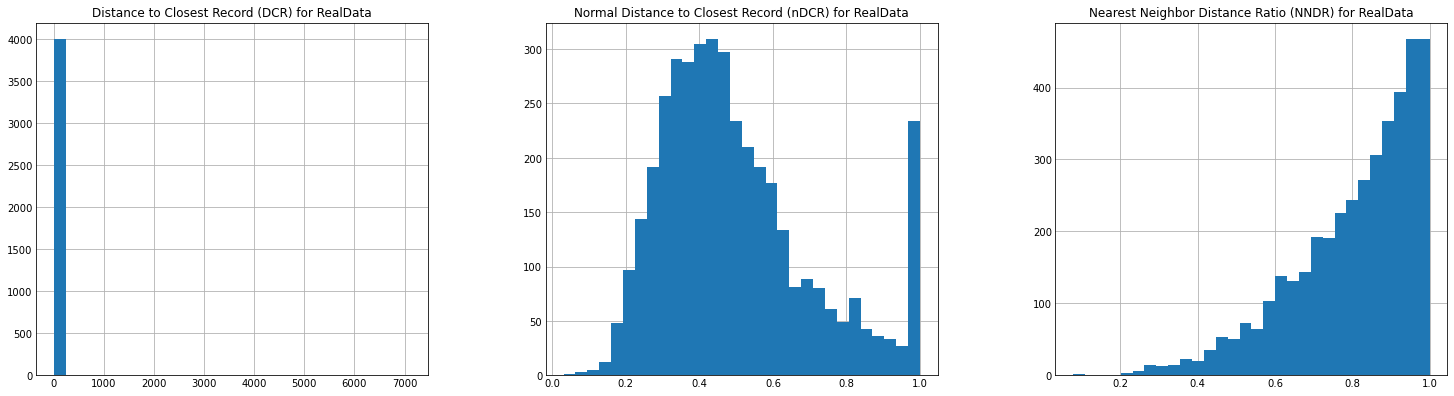

In [61]:
real_privacy = pd.DataFrame(zip(dcr_real,dcr_real_norm,nndr_real),columns=['Distance to Closest Record (DCR) for RealData','Normal Distance to Closest Record (nDCR) for RealData','Nearest Neighbor Distance Ratio (NNDR) for RealData'])
real_privacy.hist(bins=privacy_number_of_bins, grid=True, figsize=(20, 5), layout=(1, 3))

In [62]:
def calc_dcr_ratio(real_dcr:np.array, synt_dcr:np.array):
    med_real = np.median(real_dcr) 
    ordered_synt = np.sort(synt_dcr)
    middle = len(ordered_synt)//2
    if ordered_synt[middle] <= med_real :
        for i in range(middle) :
            if (i == middle) or (ordered_synt[middle+i+1] >= med_real) :
                break
        first_median_synt = middle + i
    else:
        for i in range(middle) :
            if (i == middle) or (ordered_synt[middle-i-1] < med_real) :
                break
        first_median_synt = middle - i
    return (len(ordered_synt)-first_median_synt)/max(first_median_synt,smoothing_factor)

In [63]:
def calc_nndr_ratio(real_nndr:np.array, synt_nndr:np.array):
    med_real = np.median(real_nndr) 
    ordered_synt = np.sort(synt_nndr)
    middle = len(ordered_synt)//2
    if ordered_synt[middle] <= med_real :
        for i in range(middle) :
            if (i == middle) or (ordered_synt[middle+i+1] >= med_real) :
                break
        first_median_synt = middle + i
    else:
        for i in range(middle) :
            if (i == middle) or (ordered_synt[middle-i-1] < med_real) :
                break
        first_median_synt = middle - i
    return (len(ordered_synt)-first_median_synt)/max(first_median_synt,smoothing_factor)

In [64]:
calc_dcr_ratio(dcr_real_norm,dcr_real_norm.copy())

1.0

In [65]:
calc_nndr_ratio(nndr_real,nndr_real.copy())

1.0

In [66]:
privacy_results = pd.DataFrame(columns=['Model','95% bound','DCRn ratio','NNDR ratio','DCRn median', 'NNDR median','Minimal distance'])

In [67]:
res_privacy = pd.DataFrame([['Real dataset', bound,
                        calc_dcr_ratio(dcr_real_norm,dcr_real_norm.copy()),
                        calc_nndr_ratio(nndr_real,nndr_real.copy()),
                        np.median(dcr_real_norm),
                        np.median(nndr_real),
                        dcr_real_norm.min()    ]],
                        columns=['Model','95% bound','DCRn ratio','NNDR ratio','DCRn median', 'NNDR median','Minimal distance'])

privacy_results = pd.concat([privacy_results, res_privacy],axis=0)

C:\Users\AlexeyNeyman\AppData\Local\Temp\ipykernel_17368\106412619.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  privacy_results = pd.concat([privacy_results, res_privacy],axis=0)


## DistillGPT2 privacy

In [68]:
syn_test1 = synt_data_distilgpt2.sample(n=4000) 

In [69]:
syn_test_neightbors1 = nn_model.kneighbors(syn_test1, n_neighbors=2)

In [70]:
print('Stats : mean, std, max, min, amount')
dcr_synt1 = syn_test_neightbors1[0][:, 0]
#print('DCR  stats', dcr_synt1.mean(), dcr_synt1.std(), dcr_synt1.max(), dcr_synt1.min(), len (dcr_synt1))
dcr2_synt1 = syn_test_neightbors1[0][:, 1]
#print('DCR2 stats', dcr2_synt1.mean(), dcr2_synt1.std(), dcr2_synt1.max(), dcr2_synt1.min(), len (dcr2_synt1))
nndr_synt1 = dcr_synt1 / np.maximum(dcr2_synt1, smoothing_factor)    
baseline_dcr = dcr_synt1
bound1 = np.quantile(baseline_dcr[~np.isnan(baseline_dcr)], dcr_quantile)
print('NNDR stats', nndr_synt1.mean(), nndr_synt1.std(), nndr_synt1.max(), nndr_synt1.min(), len (nndr_synt1))
dcr_synt_norm1 = np.where(dcr_synt1 <= bound, dcr_synt1 / bound, 1)
print('nDCR stats', dcr_synt_norm1.mean(), dcr_synt_norm1.std(), dcr_synt_norm1.max(), dcr_synt_norm1.min(), len(dcr_synt_norm1))

Stats : mean, std, max, min, amount
NNDR stats 0.8700386873010302 0.1310707628859289 1.0 0.02400750571863603 4000
nDCR stats 0.6973198727061886 0.22398075879556667 1.0 0.09453014227289248 4000


array([[<AxesSubplot:title={'center':'Distance to Closest Record (DCR) for DistillGPT synthetics '}>,
        <AxesSubplot:title={'center':'Normal Distance to Closest Record (nDCR) for DistillGPT synthetics'}>,
        <AxesSubplot:title={'center':'Nearest Neighbor Distance Ratio (NNDR) for DistillGPT synthetics'}>]],
      dtype=object)

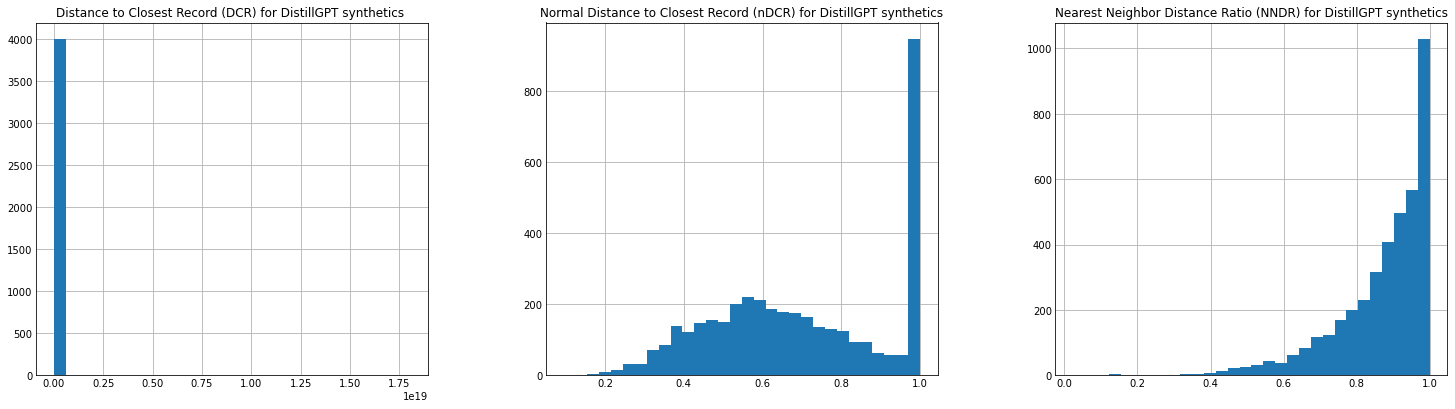

In [71]:
synt_privacy = pd.DataFrame(zip(dcr_synt1,dcr_synt_norm1,nndr_synt1),columns=['Distance to Closest Record (DCR) for DistillGPT synthetics ','Normal Distance to Closest Record (nDCR) for DistillGPT synthetics','Nearest Neighbor Distance Ratio (NNDR) for DistillGPT synthetics'])
synt_privacy.hist(bins=privacy_number_of_bins, grid=True, figsize=(20, 5), layout=(1, 3))

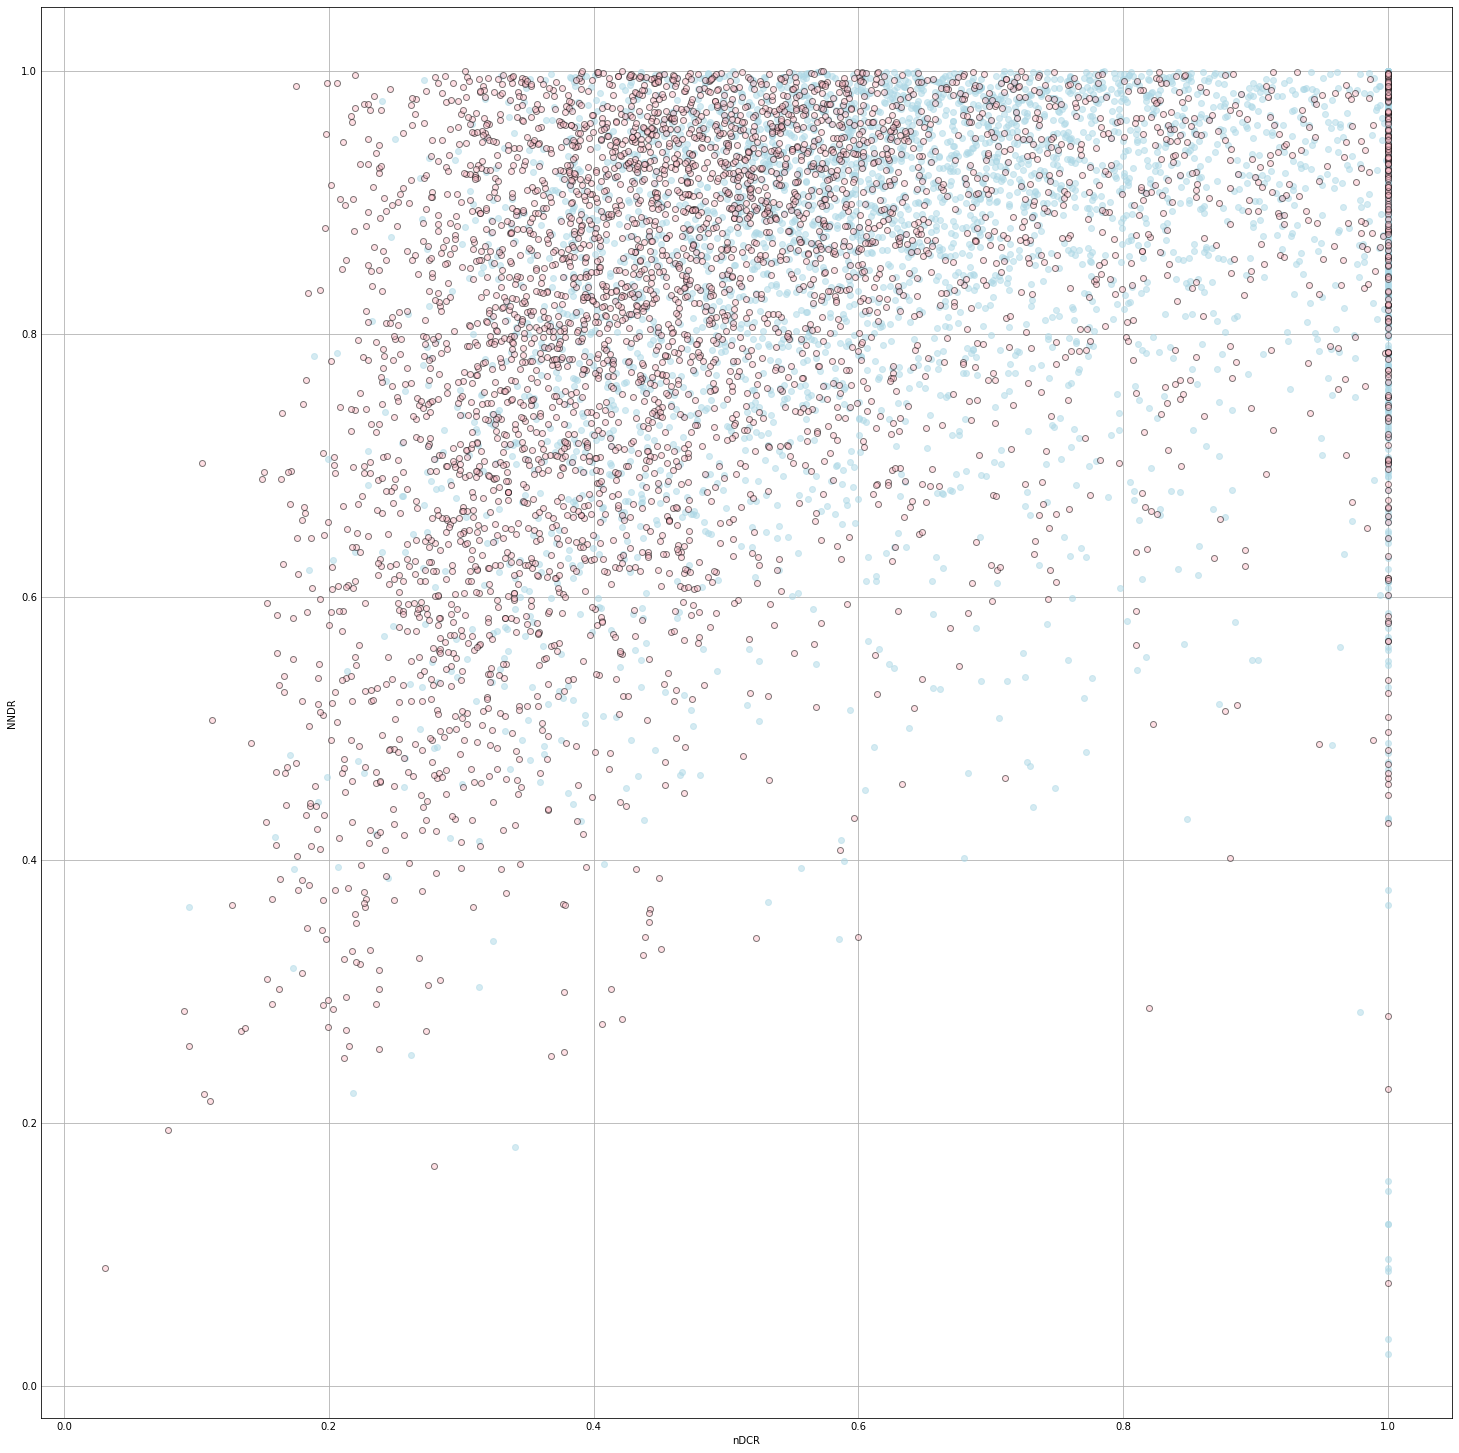

In [72]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("nDCR")
plt.ylabel("NNDR")
#ax.scatter(cols_compare['Longitude']['gpt2xl'], cols_compare['Latitude']['gpt2xl'],c='lightgreen', label='gpt2xl', alpha=0.1, edgecolors='lightgreen')
#ax.scatter(cols_compare['Longitude']['cerebras'], cols_compare['Latitude']['cerebras'],c='cyan', label='cerebras', alpha=0.5, edgecolors='cyan')
ax.scatter(dcr_synt_norm1, nndr_synt1, c='lightblue', label='DistilledGPT', alpha=0.5, edgecolors='lightblue')
ax.scatter(dcr_real_norm, nndr_real, c='pink', label='Real', alpha=0.5, edgecolors='black')
plt.show()

In [73]:
calc_dcr_ratio(dcr_real_norm,dcr_synt_norm1)

5.1255742725880555

In [74]:
calc_nndr_ratio(nndr_real,nndr_synt1)

2.215434083601286

In [75]:
stat, p_value = mannwhitneyu(dcr_real_norm, dcr_synt_norm1)
print(f" Mann-Whitney U rank test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = mannwhitneyu(nndr_real, nndr_synt1)
print(f" Mann-Whitney U rank test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")

stat, p_value = ks_2samp(dcr_real_norm, dcr_synt_norm1)
print(f" Kolmogorov-Smirnov Test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = ks_2samp(nndr_real, nndr_synt1)
print(f" Kolmogorov-Smirnov Test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")

 Mann-Whitney U rank test for nDCR: statistic=4044177.00000000, p-value=0.00000000
 Mann-Whitney U rank test for NNDR: statistic=5873891.000000, p-value=0.000000
 Kolmogorov-Smirnov Test for nDCR: statistic=0.38575000, p-value=0.00000000
 Kolmogorov-Smirnov Test for NNDR: statistic=0.193000, p-value=0.000000


In [76]:
res_privacy = pd.DataFrame([['Distilled GPT', bound1,
                        calc_dcr_ratio(dcr_real_norm,dcr_synt_norm1),
                        calc_nndr_ratio(nndr_real,nndr_synt1),
                        np.median(dcr_synt_norm1),
                        np.median(nndr_synt1),
                        dcr_synt_norm1.min()    ]],
                        columns=['Model','95% bound','DCRn ratio','NNDR ratio','DCRn median', 'NNDR median','Minimal distance'])

privacy_results = pd.concat([privacy_results, res_privacy],axis=0)

## GPT2XL privacy

In [77]:
syn_test2 = synt_data_gpt2xl.sample(n=4000) 

In [78]:
syn_test_neightbors2 = nn_model.kneighbors(syn_test2, n_neighbors=2)

In [79]:
print('Stats : mean, std, max, min, amount')
dcr_synt2 = syn_test_neightbors2[0][:, 0]
dcr2_synt2 = syn_test_neightbors2[0][:, 1]
nndr_synt2 = dcr_synt2 / np.maximum(dcr2_synt2, smoothing_factor)    
baseline_dcr = dcr_synt2
bound2 = np.quantile(baseline_dcr[~np.isnan(baseline_dcr)], dcr_quantile)
print('NNDR stats', nndr_synt2.mean(), nndr_synt2.std(), nndr_synt2.max(), nndr_synt2.min(), len (nndr_synt2))
dcr_synt_norm2 = np.where(dcr_synt2 <= bound, dcr_synt2 / bound, 1)
print('nDCR stats', dcr_synt_norm2.mean(), dcr_synt_norm2.std(), dcr_synt_norm2.max(), dcr_synt_norm2.min(), len (dcr_synt_norm2))

Stats : mean, std, max, min, amount
NNDR stats 0.8201429051531457 0.15395778146675865 0.9999999999999996 0.1443203259666145 4000
nDCR stats 0.5469094556552295 0.22549237840908368 1.0 0.09180001584474248 4000


array([[<AxesSubplot:title={'center':'Distance to Closest Record (DCR) for GPT2xl synthetics '}>,
        <AxesSubplot:title={'center':'Normal Distance to Closest Record (nDCR) for GPT2xl synthetics'}>,
        <AxesSubplot:title={'center':'Nearest Neighbor Distance Ratio (NNDR) for GPT2xl synthetics'}>]],
      dtype=object)

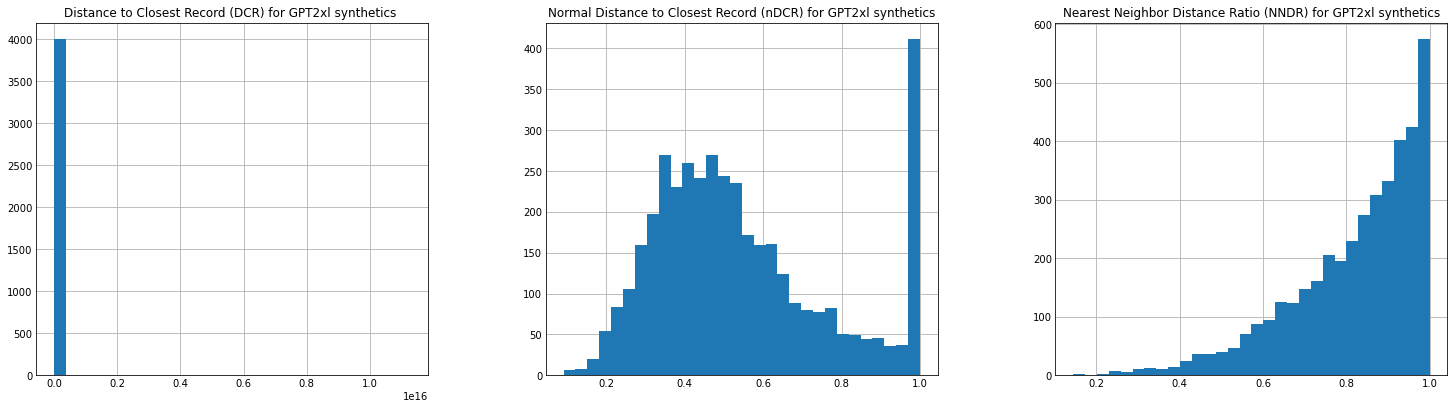

In [80]:
synt_privacy = pd.DataFrame(zip(dcr_synt2,dcr_synt_norm2,nndr_synt2),columns=['Distance to Closest Record (DCR) for GPT2xl synthetics ','Normal Distance to Closest Record (nDCR) for GPT2xl synthetics','Nearest Neighbor Distance Ratio (NNDR) for GPT2xl synthetics'])
synt_privacy.hist(bins=privacy_number_of_bins, grid=True, figsize=(20, 5), layout=(1, 3))

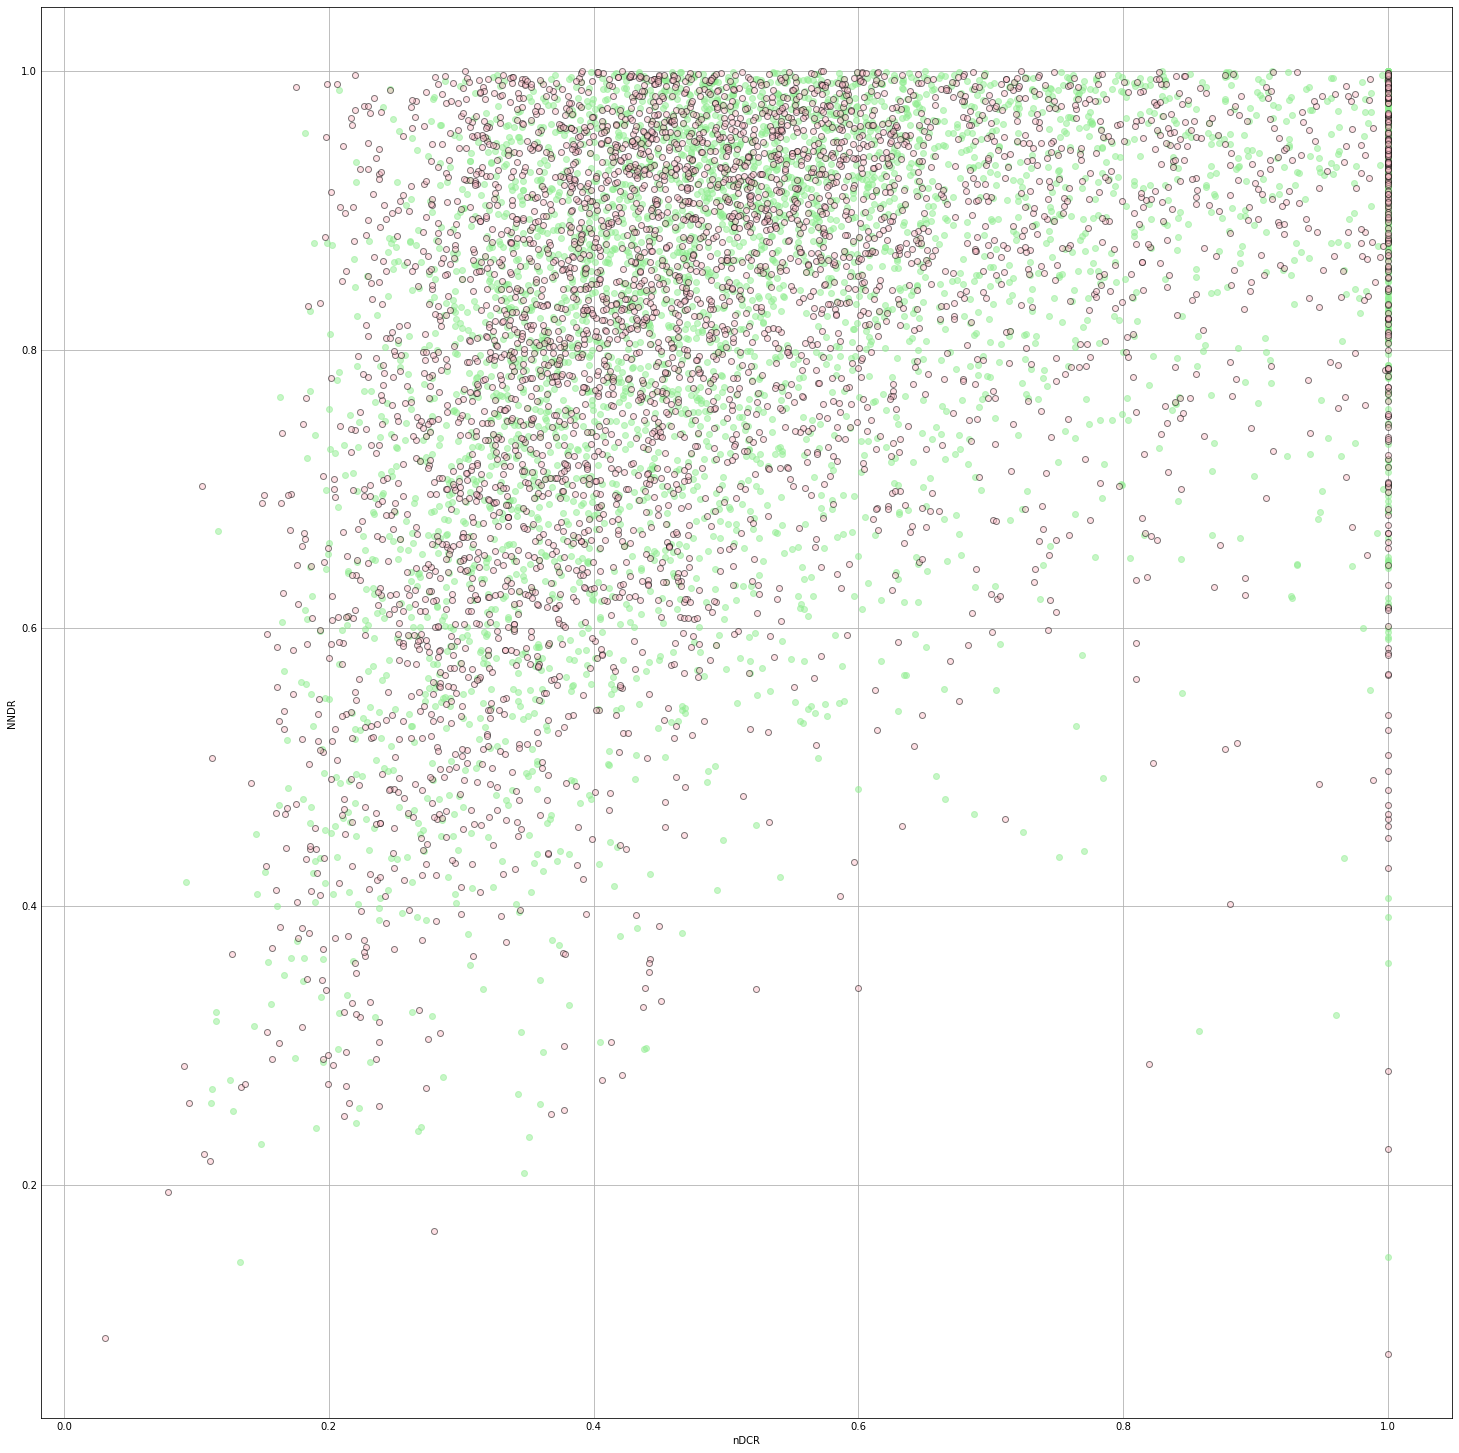

In [81]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("nDCR")
plt.ylabel("NNDR")
ax.scatter(dcr_synt_norm2, nndr_synt2, c='lightgreen', label='GPT2xl', alpha=0.5, edgecolors='lightgreen')
ax.scatter(dcr_real_norm, nndr_real, c='pink', label='Real data', alpha=0.5, edgecolors='black')
plt.show()

In [82]:
calc_dcr_ratio(dcr_real_norm,dcr_synt_norm2)

1.442002442002442

In [83]:
calc_nndr_ratio(nndr_real,nndr_synt2)

1.1727322107550244

In [84]:
stat, p_value = mannwhitneyu(dcr_real_norm, dcr_synt_norm2)
print(f" Mann-Whitney U rank test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = mannwhitneyu(nndr_real, nndr_synt2)
print(f" Mann-Whitney U rank test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")
print ('')


print ('')
stat, p_value = ks_2samp(dcr_real_norm, dcr_synt_norm2)
print(f" Kolmogorov-Smirnov Test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = ks_2samp(nndr_real, nndr_synt2)
print(f" Kolmogorov-Smirnov Test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")

 Mann-Whitney U rank test for nDCR: statistic=7030252.00000000, p-value=0.00000000
 Mann-Whitney U rank test for NNDR: statistic=7526637.000000, p-value=0.000005


 Kolmogorov-Smirnov Test for nDCR: statistic=0.09575000, p-value=0.00000000
 Kolmogorov-Smirnov Test for NNDR: statistic=0.044750, p-value=0.000663


In [85]:
res_privacy = pd.DataFrame([['GPT2XL', bound2,
                        calc_dcr_ratio(dcr_real_norm,dcr_synt_norm2),
                        calc_nndr_ratio(nndr_real,nndr_synt2),
                        np.median(dcr_synt_norm2),
                        np.median(nndr_synt2),
                        dcr_synt_norm2.min()    ]],
                        columns=['Model','95% bound','DCRn ratio','NNDR ratio','DCRn median', 'NNDR median','Minimal distance'])

privacy_results = pd.concat([privacy_results, res_privacy],axis=0)

## Cerebras privacy

In [86]:
syn_test3 = synt_data_cerebras.sample(n=4000)

In [87]:
syn_test_neightbors3 = nn_model.kneighbors(syn_test3, n_neighbors=2)

In [88]:
print('Stats : mean, std, max, min, amount')
dcr_synt3 = syn_test_neightbors3[0][:, 0]
dcr2_synt3 = syn_test_neightbors3[0][:, 1]
baseline_dcr = dcr_synt3
bound3 = np.quantile(baseline_dcr[~np.isnan(baseline_dcr)], dcr_quantile)
nndr_synt3 = dcr_synt3 / np.maximum(dcr2_synt3, smoothing_factor)    
print('NNDR stats', nndr_synt3.mean(), nndr_synt3.std(), nndr_synt3.max(), nndr_synt3.min(), len (nndr_synt3))
dcr_synt_norm3 = np.where(dcr_synt3 <= bound, dcr_synt3 / bound, 1)
print('nDCR stats', dcr_synt_norm3.mean(), dcr_synt_norm3.std(), dcr_synt_norm3.max(), dcr_synt_norm3.min(), len (dcr_synt_norm3))

Stats : mean, std, max, min, amount
NNDR stats 0.8226714645899347 0.15130373730203533 1.0 0.14286208265420566 4000
nDCR stats 0.5493753771871737 0.2262786535029478 1.0 0.08372393232532857 4000


array([[<AxesSubplot:title={'center':'Distance to Closest Record (DCR) for Cerebras synthetics '}>,
        <AxesSubplot:title={'center':'Normal Distance to Closest Record (nDCR) for Cerebras synthetics'}>,
        <AxesSubplot:title={'center':'Nearest Neighbor Distance Ratio (NNDR) for Cerebras synthetics'}>]],
      dtype=object)

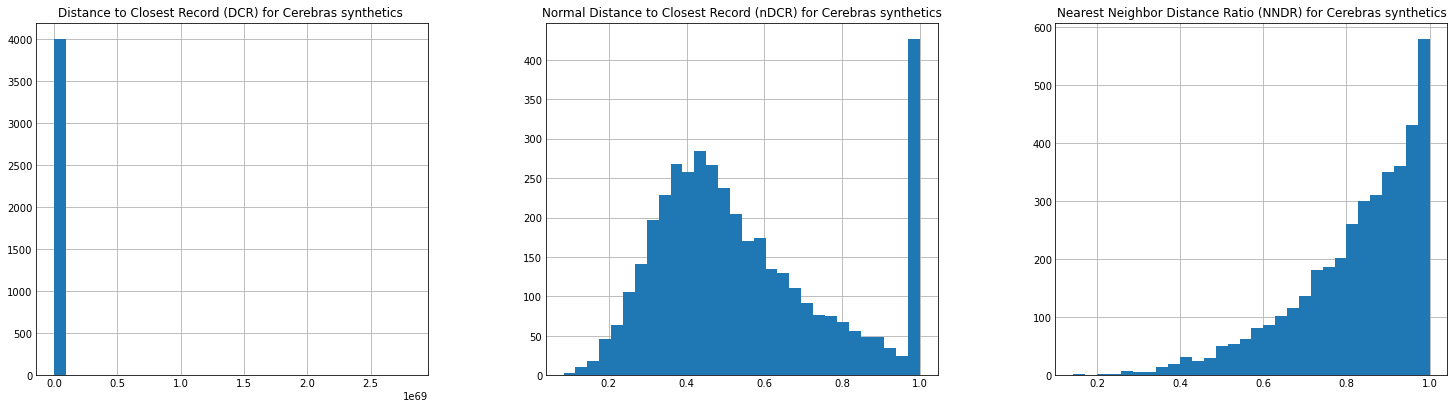

In [89]:
synt_privacy = pd.DataFrame(zip(dcr_synt3,dcr_synt_norm3,nndr_synt3),columns=['Distance to Closest Record (DCR) for Cerebras synthetics ','Normal Distance to Closest Record (nDCR) for Cerebras synthetics','Nearest Neighbor Distance Ratio (NNDR) for Cerebras synthetics'])
synt_privacy.hist(bins=privacy_number_of_bins, grid=True, figsize=(20, 5), layout=(1, 3))

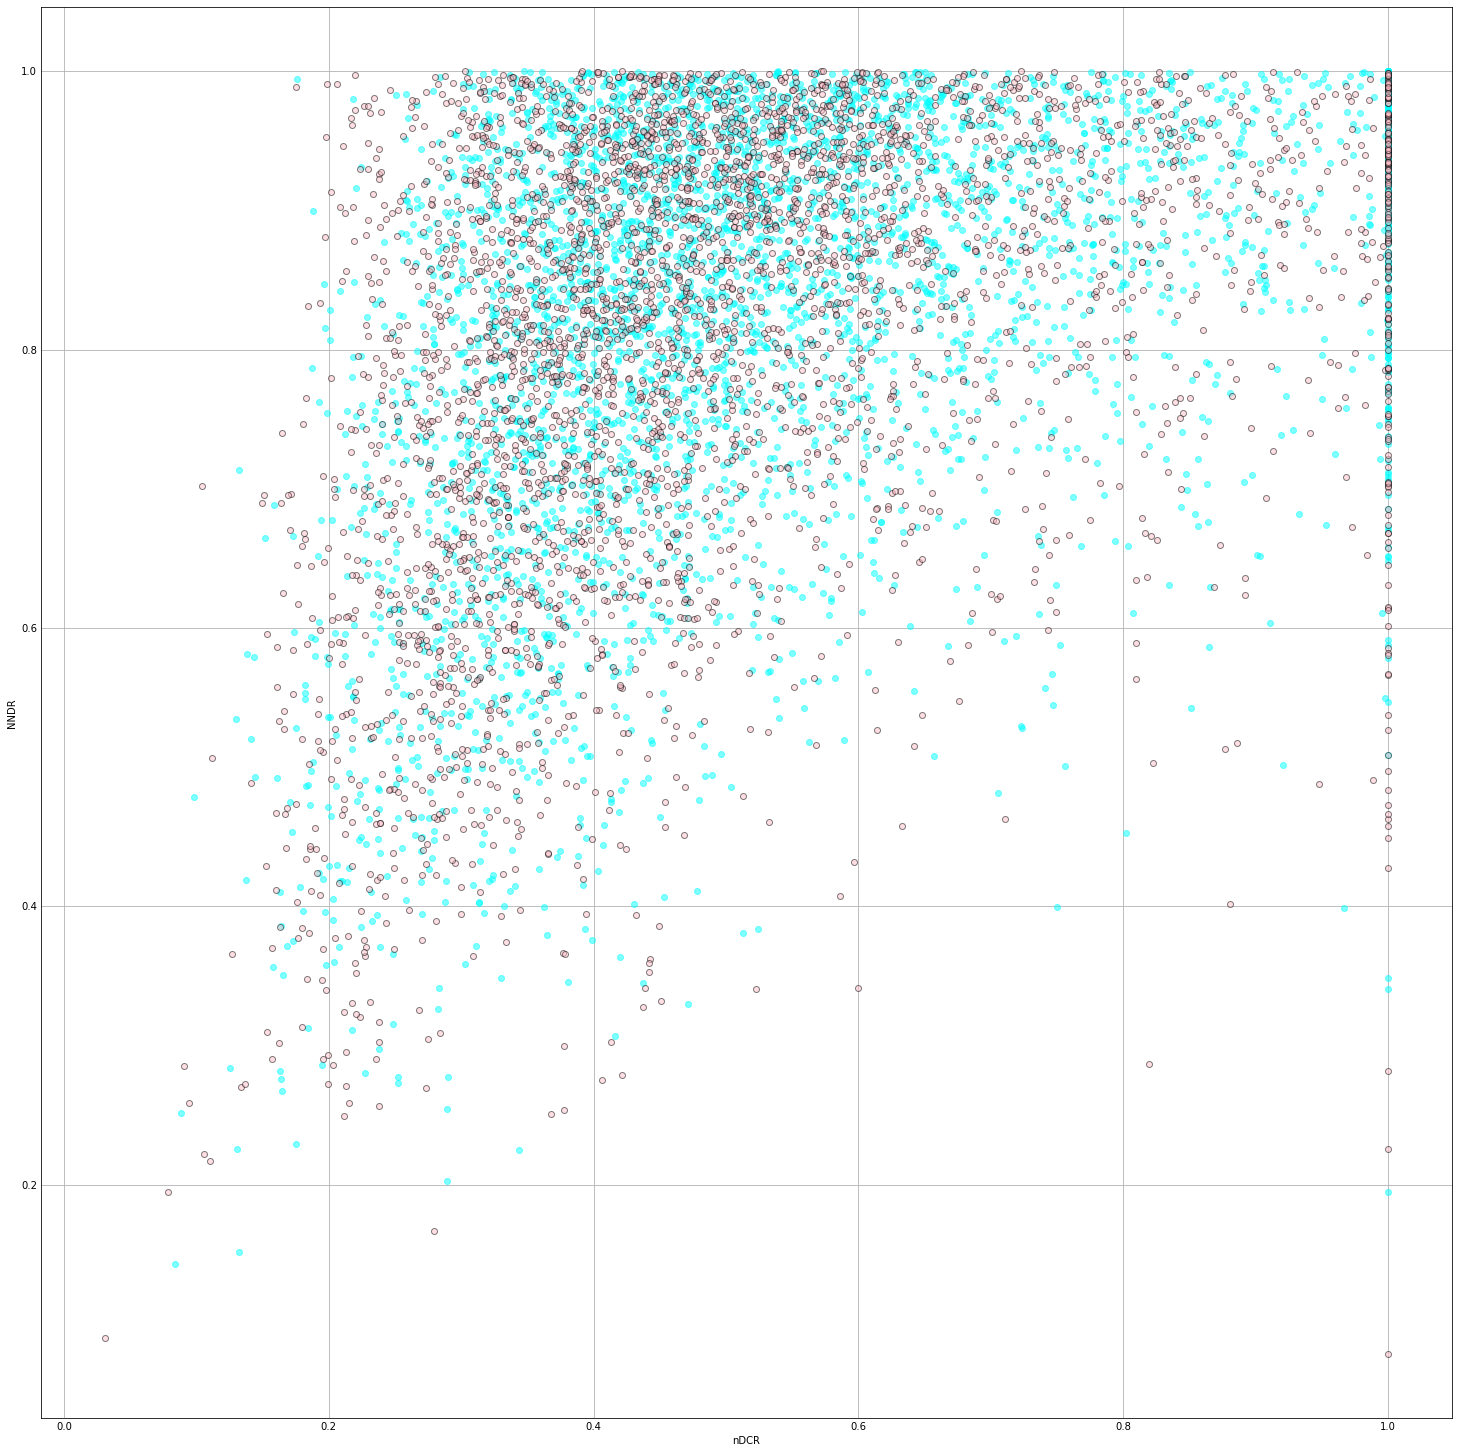

In [90]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("nDCR")
plt.ylabel("NNDR")
ax.scatter(dcr_synt_norm3, nndr_synt3, c='cyan', label='Cerebras', alpha=0.5, edgecolors='cyan')
ax.scatter(dcr_real_norm, nndr_real, c='pink', label='Real', alpha=0.5, edgecolors='black')
plt.show()

In [91]:
calc_dcr_ratio(dcr_real_norm,dcr_synt_norm3)

1.4081878386514148

In [92]:
calc_nndr_ratio(nndr_real,nndr_synt3)

1.1727322107550244

In [93]:
stat, p_value = mannwhitneyu(dcr_real_norm, dcr_synt_norm3)
print(f" Mann-Whitney U rank test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = mannwhitneyu(nndr_real, nndr_synt3)
print(f" Mann-Whitney U rank test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")
print ('')


print ('')
stat, p_value = ks_2samp(dcr_real_norm, dcr_synt_norm3)
print(f" Kolmogorov-Smirnov Test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = ks_2samp(nndr_real, nndr_synt3)
print(f" Kolmogorov-Smirnov Test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")

 Mann-Whitney U rank test for nDCR: statistic=6990868.00000000, p-value=0.00000000
 Mann-Whitney U rank test for NNDR: statistic=7474977.000000, p-value=0.000000


 Kolmogorov-Smirnov Test for nDCR: statistic=0.08925000, p-value=0.00000000
 Kolmogorov-Smirnov Test for NNDR: statistic=0.054250, p-value=0.000015


In [94]:
res_privacy = pd.DataFrame([['Cerebras', bound3,
                        calc_dcr_ratio(dcr_real_norm,dcr_synt_norm3),
                        calc_nndr_ratio(nndr_real,nndr_synt3),
                        np.median(dcr_synt_norm3),
                        np.median(nndr_synt3),
                        dcr_synt_norm3.min()    ]],
                        columns=['Model','95% bound','DCRn ratio','NNDR ratio','DCRn median', 'NNDR median','Minimal distance'])

privacy_results = pd.concat([privacy_results, res_privacy],axis=0)

## Phi-1.5 privacy

In [95]:
syn_test4 = synt_data_phi.sample(n=4000)

In [96]:
syn_test_neightbors4 = nn_model.kneighbors(syn_test4, n_neighbors=2)

In [97]:
print('Stats : mean, std, max, min, amount')
dcr_synt4 = syn_test_neightbors4[0][:, 0]
dcr2_synt4 = syn_test_neightbors4[0][:, 1]
nndr_synt4 = dcr_synt4 / np.maximum(dcr2_synt4, smoothing_factor)   
baseline_dcr = dcr_synt4
bound4 = np.quantile(baseline_dcr[~np.isnan(baseline_dcr)], dcr_quantile)
print('NNDR stats', nndr_synt4.mean(), nndr_synt4.std(), nndr_synt4.max(), nndr_synt4.min(), len (nndr_synt4))
dcr_synt_norm4 = np.where(dcr_synt4 <= bound, dcr_synt4 / bound, 1)
print('nDCR stats', dcr_synt_norm4.mean(), dcr_synt_norm4.std(), dcr_synt_norm4.max(), dcr_synt_norm4.min(), len (dcr_synt_norm4))

Stats : mean, std, max, min, amount
NNDR stats 0.8142545928648824 0.15365540904241287 0.9999999999998592 0.06885026442080157 4000
nDCR stats 0.5387483257234076 0.22215540109679519 1.0 0.07307347948129045 4000


array([[<AxesSubplot:title={'center':'Distance to Closest Record (DCR) for Phi synthetics '}>,
        <AxesSubplot:title={'center':'Normal Distance to Closest Record (nDCR) for Phi synthetics'}>,
        <AxesSubplot:title={'center':'Nearest Neighbor Distance Ratio (NNDR) for Phi synthetics'}>]],
      dtype=object)

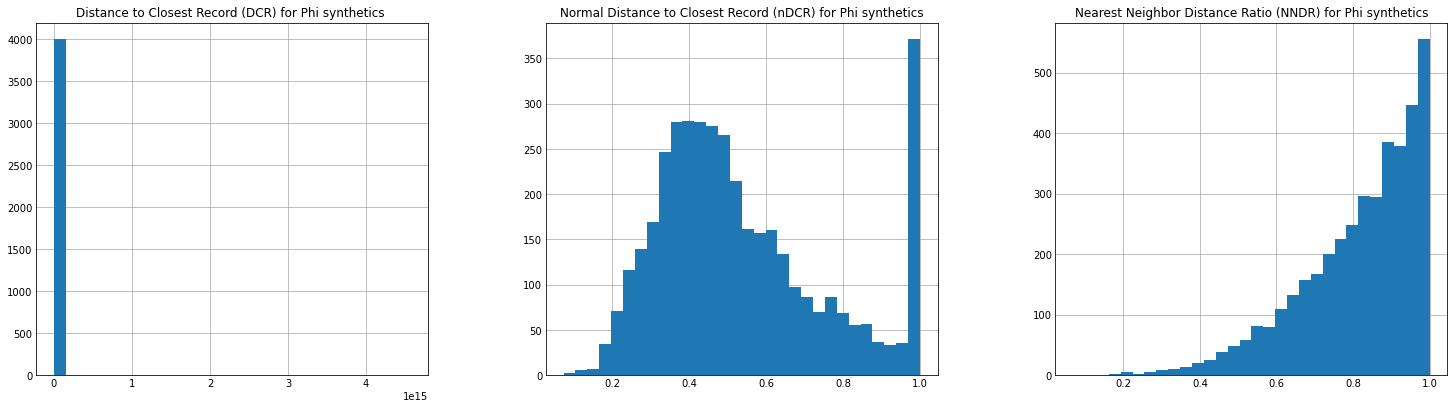

In [98]:
synt_privacy = pd.DataFrame(zip(dcr_synt4,dcr_synt_norm4,nndr_synt4),columns=['Distance to Closest Record (DCR) for Phi synthetics ','Normal Distance to Closest Record (nDCR) for Phi synthetics','Nearest Neighbor Distance Ratio (NNDR) for Phi synthetics'])
synt_privacy.hist(bins=privacy_number_of_bins, grid=True, figsize=(20, 5), layout=(1, 3))

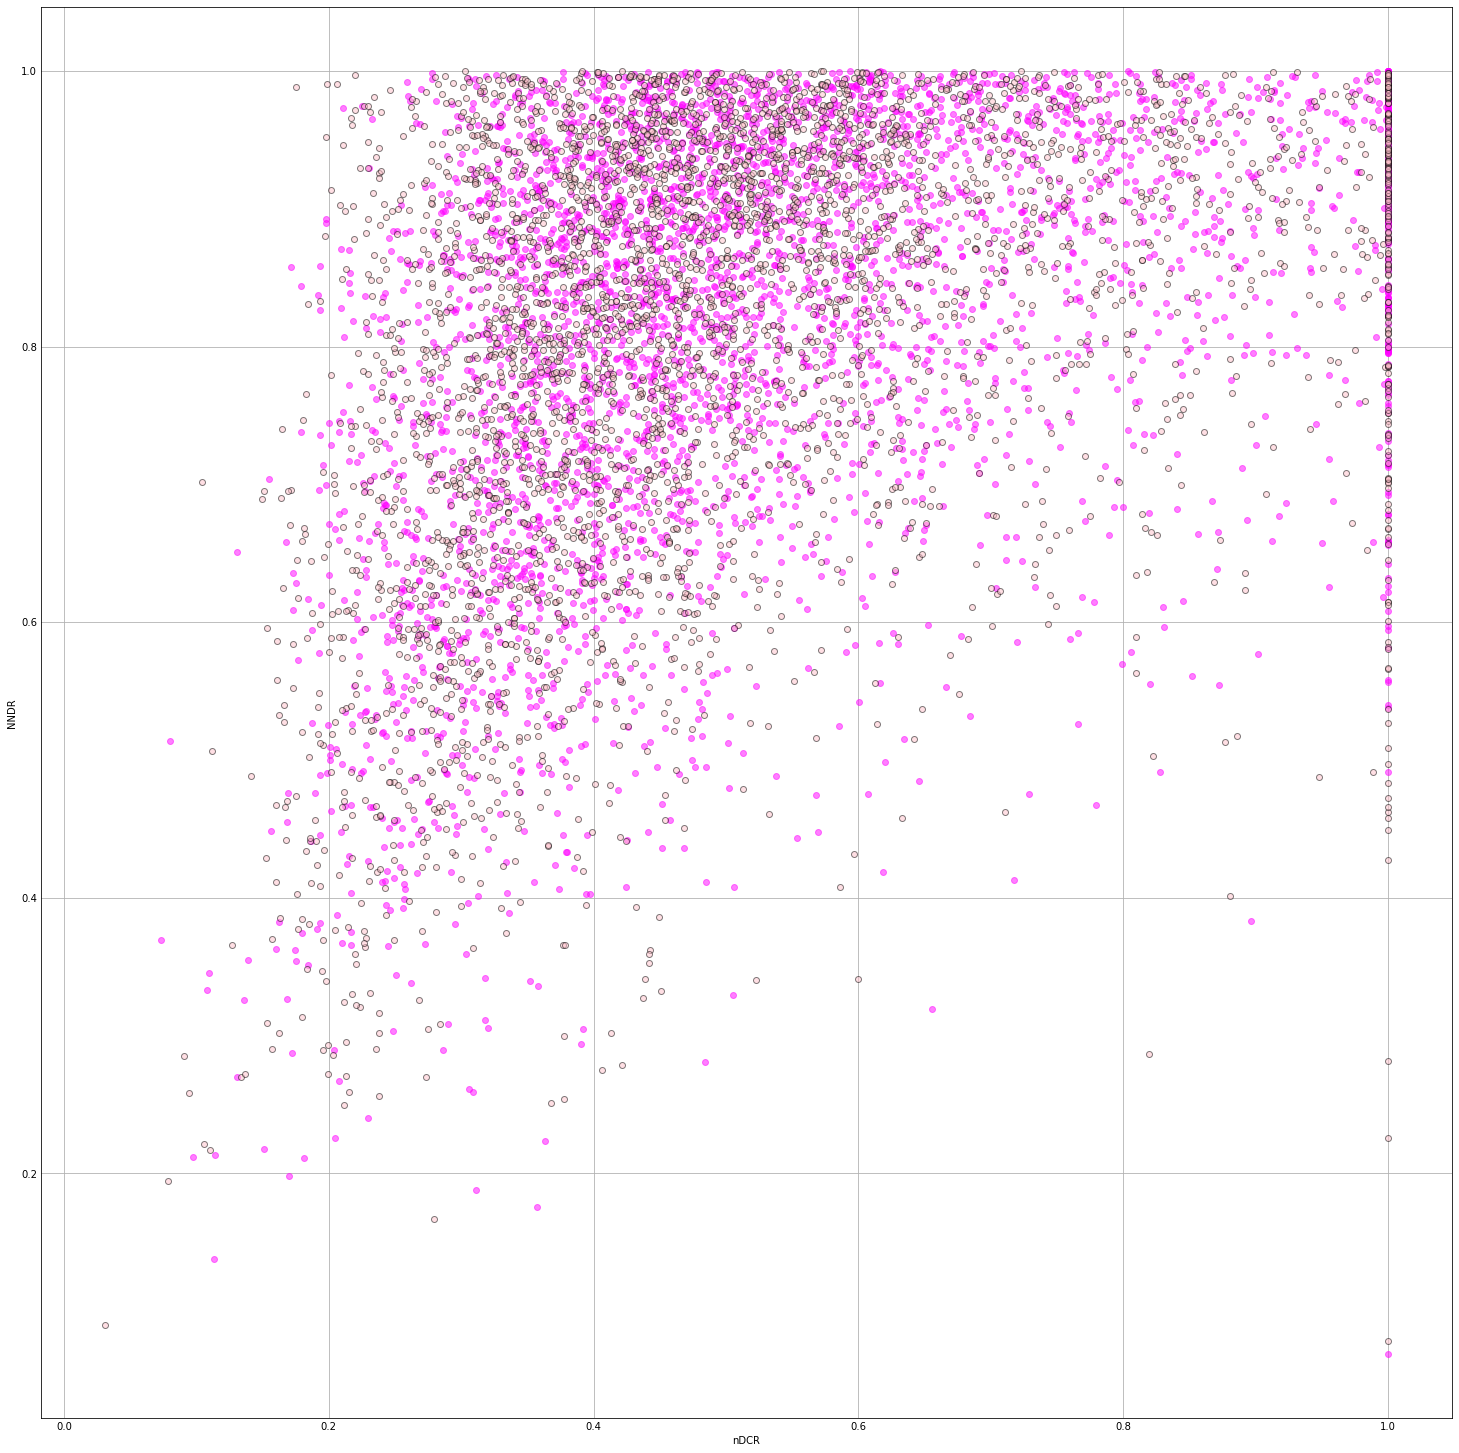

In [99]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("nDCR")
plt.ylabel("NNDR")
ax.scatter(dcr_synt_norm4, nndr_synt4, c='magenta', label='Phi-1.5', alpha=0.5, edgecolors='magenta')
ax.scatter(dcr_real_norm, nndr_real, c='pink', label='Real', alpha=0.5, edgecolors='black')
plt.show()

In [100]:
calc_dcr_ratio(dcr_real_norm,dcr_synt_norm4)

1.3028209556706967

In [101]:
calc_nndr_ratio(nndr_real,nndr_synt4)

1.0629190304280558

In [102]:
stat, p_value = mannwhitneyu(dcr_real_norm, dcr_synt_norm4)
print(f" Mann-Whitney U rank test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = mannwhitneyu(nndr_real, nndr_synt4)
print(f" Mann-Whitney U rank test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")
print ('')


print ('')
stat, p_value = ks_2samp(dcr_real_norm, dcr_synt_norm4)
print(f" Kolmogorov-Smirnov Test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = ks_2samp(nndr_real, nndr_synt4)
print(f" Kolmogorov-Smirnov Test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")

 Mann-Whitney U rank test for nDCR: statistic=7202224.00000000, p-value=0.00000000
 Mann-Whitney U rank test for NNDR: statistic=7748059.000000, p-value=0.014718


 Kolmogorov-Smirnov Test for nDCR: statistic=0.07425000, p-value=0.00000000
 Kolmogorov-Smirnov Test for NNDR: statistic=0.028250, p-value=0.082151


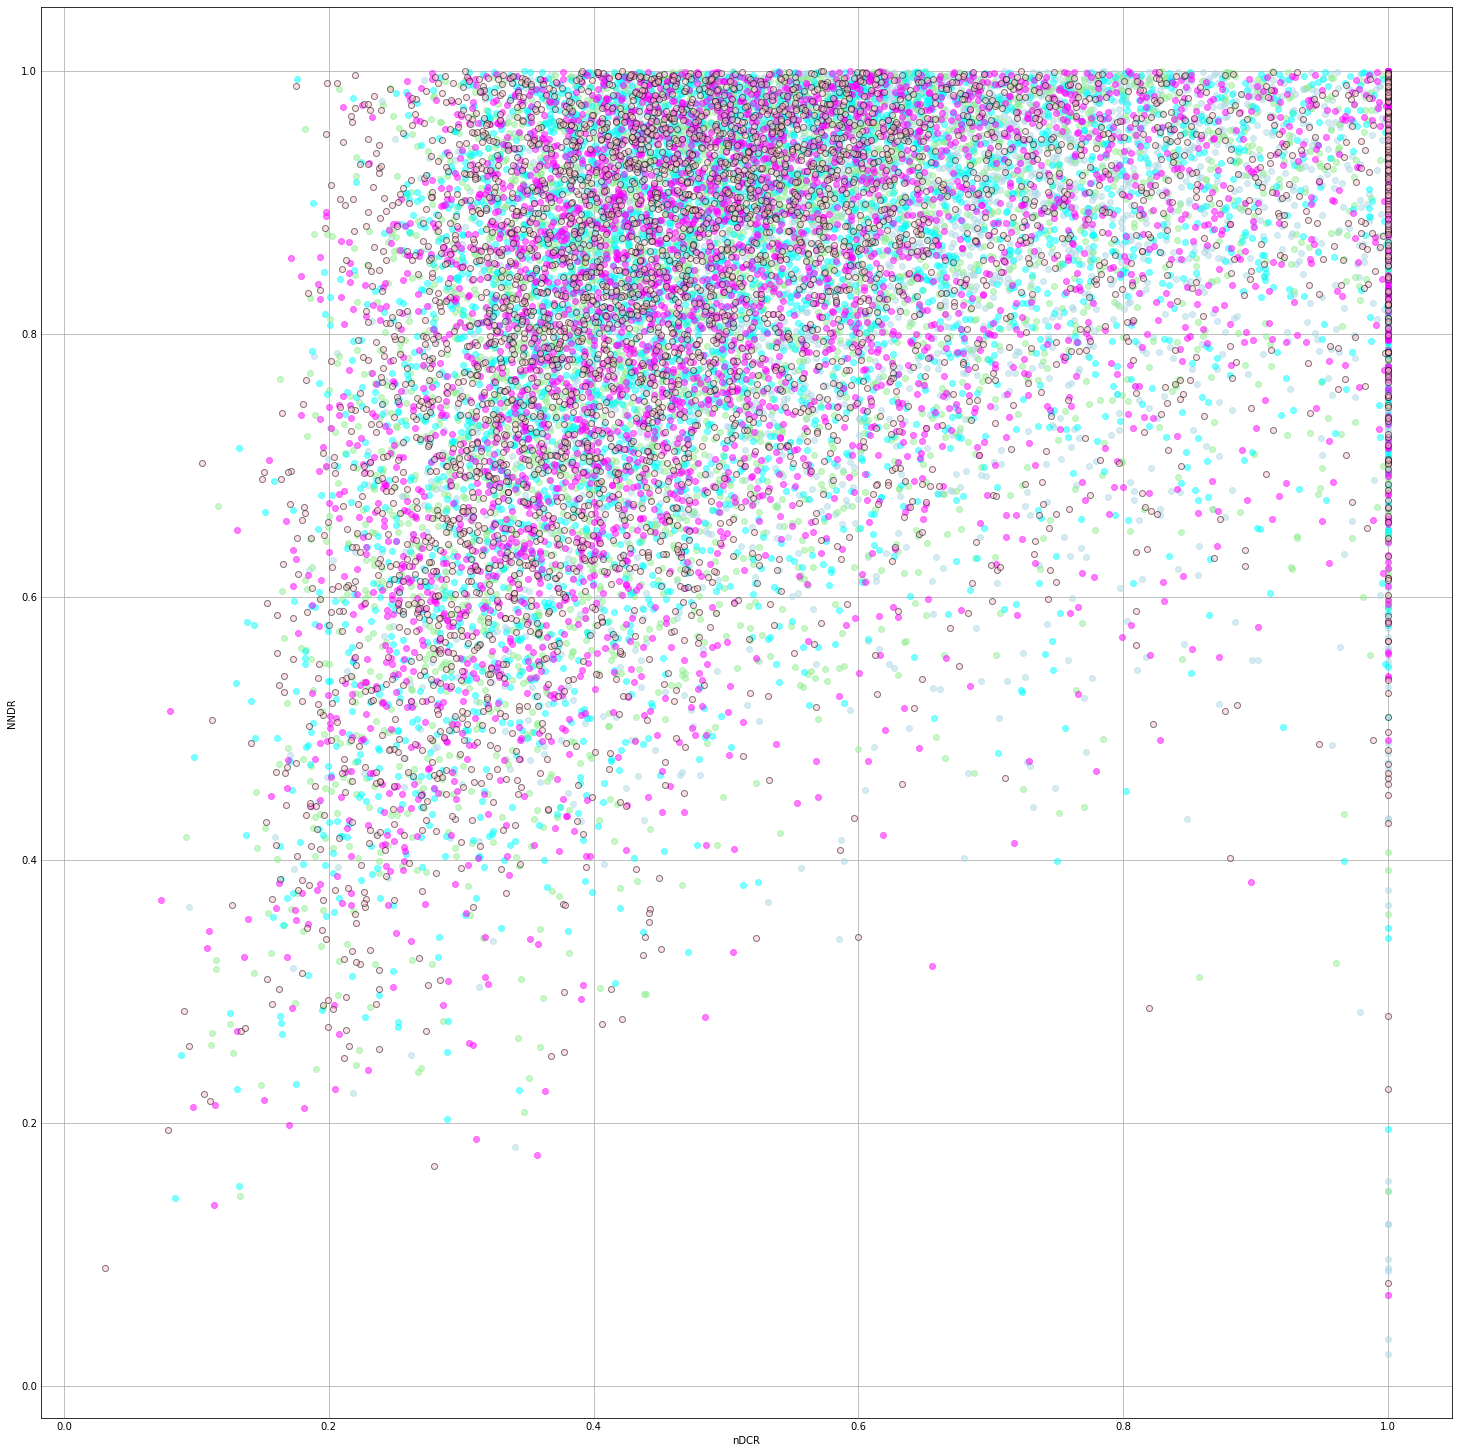

In [103]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("nDCR")
plt.ylabel("NNDR")
ax.scatter(dcr_synt_norm1, nndr_synt1, c='lightblue', label='DistilledGPT', alpha=0.5, edgecolors='lightblue')
ax.scatter(dcr_synt_norm2, nndr_synt2, c='lightgreen', label='GPT2xl', alpha=0.5, edgecolors='lightgreen')
ax.scatter(dcr_synt_norm3, nndr_synt3, c='cyan', label='Cerebras', alpha=0.5, edgecolors='cyan')
ax.scatter(dcr_synt_norm4, nndr_synt4, c='magenta', label='Phi-1.5', alpha=0.5, edgecolors='magenta')
ax.scatter(dcr_real_norm, nndr_real, c='pink', label='Real', alpha=0.5, edgecolors='black')
plt.show()

In [104]:
res_privacy = pd.DataFrame([['Phi1.5', bound4,
                        calc_dcr_ratio(dcr_real_norm,dcr_synt_norm4),
                        calc_nndr_ratio(nndr_real,nndr_synt4),
                        np.median(dcr_synt_norm4),
                        np.median(nndr_synt4),
                        dcr_synt_norm4.min()    ]],
                        columns=['Model','95% bound','DCRn ratio','NNDR ratio','DCRn median', 'NNDR median','Minimal distance'])

privacy_results = pd.concat([privacy_results, res_privacy],axis=0)

In [105]:
privacy_results

Model  95% bound  DCRn ratio  NNDR ratio  DCRn median  NNDR median  \
0   Real dataset   7.432463    1.000000    1.000000     0.455280     0.844917   
0  Distilled GPT  99.606042    5.125574    2.215434     0.674170     0.909272   
0         GPT2XL  10.576939    1.442002    1.172732     0.495510     0.861525   
0       Cerebras  11.248440    1.408188    1.172732     0.496494     0.860424   
0         Phi1.5   9.361525    1.302821    1.062919     0.486742     0.851812   

   Minimal distance  
0          0.030743  
0          0.094530  
0          0.091800  
0          0.083724  
0          0.073073

In [106]:
privacy_results.to_csv('privacy_results_shorthouses_temp1.4.csv')